In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV 

In [2]:
csv_file_path = '/Users/ashwanisindhu/Downloads/zomato-1.csv'
zomato_df= pd.read_csv(csv_file_path)
zomato_df

Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730              Naml?? Gurme           208         ??stanbul   
9547        5908749             Ceviz A??ac??           208         ??stanbul   
9548        5915807                     Huqqa           208         ??stanbul   
9549        5916112              A????k Kahve           208         ??stanbul   
9550        5927402  Walter's Coffee Roastery           208         ??stanbul   

                                                Address  \
0     Third Floor, Century City Mall, Kalayaan Avenu...   
1     Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2     Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3     Third Floor, Mega Fashion Hall, SM Megamall, O...   
4     Third Floor, Mega Atrium, SM Megamall, Ortigas...   
...                                                 ...   
9546  Kemanke?? Karamustafa Pa??a Mahallesi, R??ht??...   
9547  Ko??uyolu Mahallesi, Muhittin ??st?_nda?? Cadd...   
9548  Kuru?_e??me Mahallesi, Muallim Naci Caddesi, N...   
9549  Kuru?_e??me Mahallesi, Muallim Naci Caddesi, N...   
9550  Cafea??a Mahallesi, Bademalt?? Sokak, No 21/B,...   

                                        Locality  \
0      Century City Mall, Poblacion, Makati City   
1     Little Tokyo, Legaspi Village, Makati City   
2     Edsa Shangri-La, Ortigas, Mandaluyong City   
3         SM Megamall, Ortigas, Mandaluyong City   
4         SM Megamall, Ortigas, Mandaluyong City   
...                                          ...   
9546                                    Karak?_y   
9547                                   Ko??uyolu   
9548                                 Kuru?_e??me   
9549                                 Kuru?_e??me   
9550                                        Moda   

                                       Locality Verbose   Longitude  \
0     Century City Mall, Poblacion, Makati City, Mak...  121.027535   
1     Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101   
2     Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831   
3     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475   
4     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508   
...                                                 ...         ...   
9546                                Karak?_y, ??stanbul   28.977392   
9547                               Ko??uyolu, ??stanbul   29.041297   
9548                             Kuru?_e??me, ??stanbul   29.034640   
9549                             Kuru?_e??me, ??stanbul   29.036019   
9550                                    Moda, ??stanbul   29.026016   

       Latitude                          Cuisines  ...          Currency  \
0     14.565443        French, Japanese, Desserts  ...  Botswana Pula(P)   
1     14.553708                          Japanese  ...  Botswana Pula(P)   
2     14.581404  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)   
3     14.585318                   Japanese, Sushi  ...  Botswana Pula(P)   
4     14.584450                  Japanese, Korean  ...  Botswana Pula(P)   
...         ...                               ...  ...               ...   
9546  41.022793                           Turkish  ...  Turkish Lira(TL)   
9547  41.009847   World Cuisine, Patisserie, Cafe  ...  Turkish Lira(TL)   
9548  41.055817            Italian, World Cuisine  ...  Turkish Lira(TL)   
9549  41.057979                   Restaurant Cafe  ...  Turkish Lira(TL)   
9550  40.9

In [3]:
zomato_df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [4]:
zomato_df.tail()

Restaurant ID           Restaurant Name  Country Code       City  \
9546        5915730              Naml?? Gurme           208  ??stanbul   
9547        5908749             Ceviz A??ac??           208  ??stanbul   
9548        5915807                     Huqqa           208  ??stanbul   
9549        5916112              A????k Kahve           208  ??stanbul   
9550        5927402  Walter's Coffee Roastery           208  ??stanbul   

                                                Address     Locality  \
9546  Kemanke?? Karamustafa Pa??a Mahallesi, R??ht??...     Karak?_y   
9547  Ko??uyolu Mahallesi, Muhittin ??st?_nda?? Cadd...    Ko??uyolu   
9548  Kuru?_e??me Mahallesi, Muallim Naci Caddesi, N...  Kuru?_e??me   
9549  Kuru?_e??me Mahallesi, Muallim Naci Caddesi, N...  Kuru?_e??me   
9550  Cafea??a Mahallesi, Bademalt?? Sokak, No 21/B,...         Moda   

            Locality Verbose  Longitude   Latitude  \
9546     Karak?_y, ??stanbul  28.977392  41.022793   
9547    Ko??uyolu, ??stanbul  29.041297  41.009847   
9548  Kuru?_e??me, ??stanbul  29.034640  41.055817   
9549  Kuru?_e??me, ??stanbul  29.036019  41.057979   
9550         Moda, ??stanbul  29.026016  40.984776   

                             Cuisines  ...          Currency  \
9546                          Turkish  ...  Turkish Lira(TL)   
9547  World Cuisine, Patisserie, Cafe  ...  Turkish Lira(TL)   
9548           Italian, World Cuisine  ...  Turkish Lira(TL)   
9549                  Restaurant Cafe  ...  Turkish Lira(TL)   
9550                             Cafe  ...  Turkish Lira(TL)   

     Has Table booking Has Online delivery Is delivering now  \
9546                No                  No                No   
9547                No                  No                No   
9548                No                  No                No   
9549                No                  No                No   
9550                No                  No                No   

     Switch to order menu Price range  Aggregate rating  Rating color  \
9546                   No           3               4.1         Green   
9547                   No           3               4.2         Green   
9548                   No           4               3.7        Yellow   
9549                   No           4               4.0         Green   
9550                   No           2               4.0         Green   

     Rating text Votes  
9546   Very Good   788  
9547   Very Good  1034  
9548        Good   661  
9549   Very Good   901  
9550   Very Good   591  

[5 rows x 21 columns]

In [5]:
zomato_df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [6]:
zomato_df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [7]:
zomato_df['Cuisines'] = zomato_df['Cuisines'].fillna('NaN')

In [8]:
zomato_df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [9]:
zomato_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [10]:
zomato_df['Rating text'].unique()

array(['Excellent', 'Very Good', 'Good', 'Average', 'Not rated', 'Poor'],
      dtype=object)

In [11]:
zomato_df['Rating color'].unique()

array(['Dark Green', 'Green', 'Yellow', 'Orange', 'White', 'Red'],
      dtype=object)

In [12]:
zomato_df['Switch to order menu'].unique()

array(['No'], dtype=object)

In [13]:
zomato_df['Is delivering now'].unique()

array(['No', 'Yes'], dtype=object)

In [14]:
zomato_df['Has Online delivery'].unique()

array(['No', 'Yes'], dtype=object)

In [15]:
zomato_df['Has Table booking'].unique()

array(['Yes', 'No'], dtype=object)

In [16]:
zomato_df['Currency'].unique()

array(['Botswana Pula(P)', 'Brazilian Real(R$)', 'Dollar($)',
       'Emirati Diram(AED)', 'Indian Rupees(Rs.)',
       'Indonesian Rupiah(IDR)', 'NewZealand($)', 'Pounds(??)',
       'Qatari Rial(QR)', 'Rand(R)', 'Sri Lankan Rupee(LKR)',
       'Turkish Lira(TL)'], dtype=object)

In [17]:
zomato_df['Cuisines'].unique()

array(['French, Japanese, Desserts', 'Japanese',
       'Seafood, Asian, Filipino, Indian', ..., 'Burger, Izgara',
       'World Cuisine, Patisserie, Cafe', 'Italian, World Cuisine'],
      dtype=object)

In [18]:
zomato_df['Locality Verbose'].unique()

array(['Century City Mall, Poblacion, Makati City, Makati City',
       'Little Tokyo, Legaspi Village, Makati City, Makati City',
       'Edsa Shangri-La, Ortigas, Mandaluyong City, Mandaluyong City',
       ..., 'Ko??uyolu, ??stanbul', 'Kuru?_e??me, ??stanbul',
       'Moda, ??stanbul'], dtype=object)

In [19]:
zomato_df['Restaurant Name'].unique()

array(['Le Petit Souffle', 'Izakaya Kikufuji', 'Heat - Edsa Shangri-La',
       ..., 'Huqqa', 'A????k Kahve', "Walter's Coffee Roastery"],
      dtype=object)

In [20]:
zomato_df['City'].unique()

array(['Makati City', 'Mandaluyong City', 'Pasay City', 'Pasig City',
       'Quezon City', 'San Juan City', 'Santa Rosa', 'Tagaytay City',
       'Taguig City', 'Bras?_lia', 'Rio de Janeiro', 'S??o Paulo',
       'Albany', 'Armidale', 'Athens', 'Augusta', 'Balingup',
       'Beechworth', 'Boise', 'Cedar Rapids/Iowa City', 'Chatham-Kent',
       'Clatskanie', 'Cochrane', 'Columbus', 'Consort', 'Dalton',
       'Davenport', 'Des Moines', 'Dicky Beach', 'Dubuque',
       'East Ballina', 'Fernley', 'Flaxton', 'Forrest', 'Gainesville',
       'Hepburn Springs', 'Huskisson', 'Inverloch', 'Lakes Entrance',
       'Lakeview', 'Lincoln', 'Lorn', 'Macedon', 'Macon', 'Mayfield',
       'Mc Millan', 'Middleton Beach', 'Miller', 'Monroe', 'Montville',
       'Ojo Caliente', 'Orlando', 'Palm Cove', 'Paynesville', 'Penola',
       'Pensacola', 'Phillip Island', 'Pocatello', 'Potrero', 'Princeton',
       'Rest of Hawaii', 'Savannah', 'Singapore', 'Sioux City',
       'Tampa Bay', 'Tanunda', 'Trentha

In [21]:
zomato_df['Address'].unique()

array(['Third Floor, Century City Mall, Kalayaan Avenue, Poblacion, Makati City',
       'Little Tokyo, 2277 Chino Roces Avenue, Legaspi Village, Makati City',
       'Edsa Shangri-La, 1 Garden Way, Ortigas, Mandaluyong City', ...,
       'Kuru?_e??me Mahallesi, Muallim Naci Caddesi, No 56, Be??ikta??, ??stanbul',
       'Kuru?_e??me Mahallesi, Muallim Naci Caddesi, No 64/B, Be??ikta??, ??stanbul',
       'Cafea??a Mahallesi, Bademalt?? Sokak, No 21/B, Kad??k?_y, ??stanbul'],
      dtype=object)

In [22]:
zomato_df['Locality'].unique()

array(['Century City Mall, Poblacion, Makati City',
       'Little Tokyo, Legaspi Village, Makati City',
       'Edsa Shangri-La, Ortigas, Mandaluyong City', ..., 'Ko??uyolu',
       'Kuru?_e??me', 'Moda'], dtype=object)

In [23]:
zomato_df.City.value_counts()

New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: City, Length: 141, dtype: int64

In [24]:
ratings = zomato_df.groupby(['Aggregate rating','Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
ratings

Aggregate rating Rating color Rating text  Rating Count
0                0.0        White   Not rated          2148
1                1.8          Red        Poor             1
2                1.9          Red        Poor             2
3                2.0          Red        Poor             7
4                2.1          Red        Poor            15
5                2.2          Red        Poor            27
6                2.3          Red        Poor            47
7                2.4          Red        Poor            87
8                2.5       Orange     Average           110
9                2.6       Orange     Average           191
10               2.7       Orange     Average           250
11               2.8       Orange     Average           315
12               2.9       Orange     Average           381
13               3.0       Orange     Average           468
14               3.1       Orange     Average           519
15               3.2       Orange     Average           522
16               3.3       Orange     Average           483
17               3.4       Orange     Average           498
18               3.5       Yellow        Good           480
19               3.6       Yellow        Good           458
20               3.7       Yellow        Good           427
21               3.8       Yellow        Good           400
22               3.9       Yellow        Good           335
23               4.0        Green   Very Good           266
24               4.1        Green   Very Good           274
25               4.2        Green   Very Good           221
26               4.3        Green   Very Good           174
27               4.4        Green   Very Good           144
28               4.5   Dark Green   Excellent            95
29               4.6   Dark Green   Excellent            78
30               4.7   Dark Green   Excellent            42
31               4.8   Dark Green   Excellent            25
32               4.9   Dark Green   Excellent            61

In [25]:
label_encoders = {}
for column in zomato_df.select_dtypes(include=['object']).columns:
        label_encoders[column] = LabelEncoder()
        zomato_df[column] = label_encoders[column].fit_transform(zomato_df[column])


In [26]:
zomato_df = zomato_df.drop(columns=['Longitude','Latitude'])


In [27]:
zomato_df = zomato_df.drop(columns=['Restaurant ID','Restaurant Name','Is delivering now','Switch to order menu','Rating color'])

In [28]:
zomato_df.dtypes

Country Code              int64
City                      int64
Address                   int64
Locality                  int64
Locality Verbose          int64
Cuisines                  int64
Average Cost for two      int64
Currency                  int64
Has Table booking         int64
Has Online delivery       int64
Price range               int64
Aggregate rating        float64
Rating text               int64
Votes                     int64
dtype: object

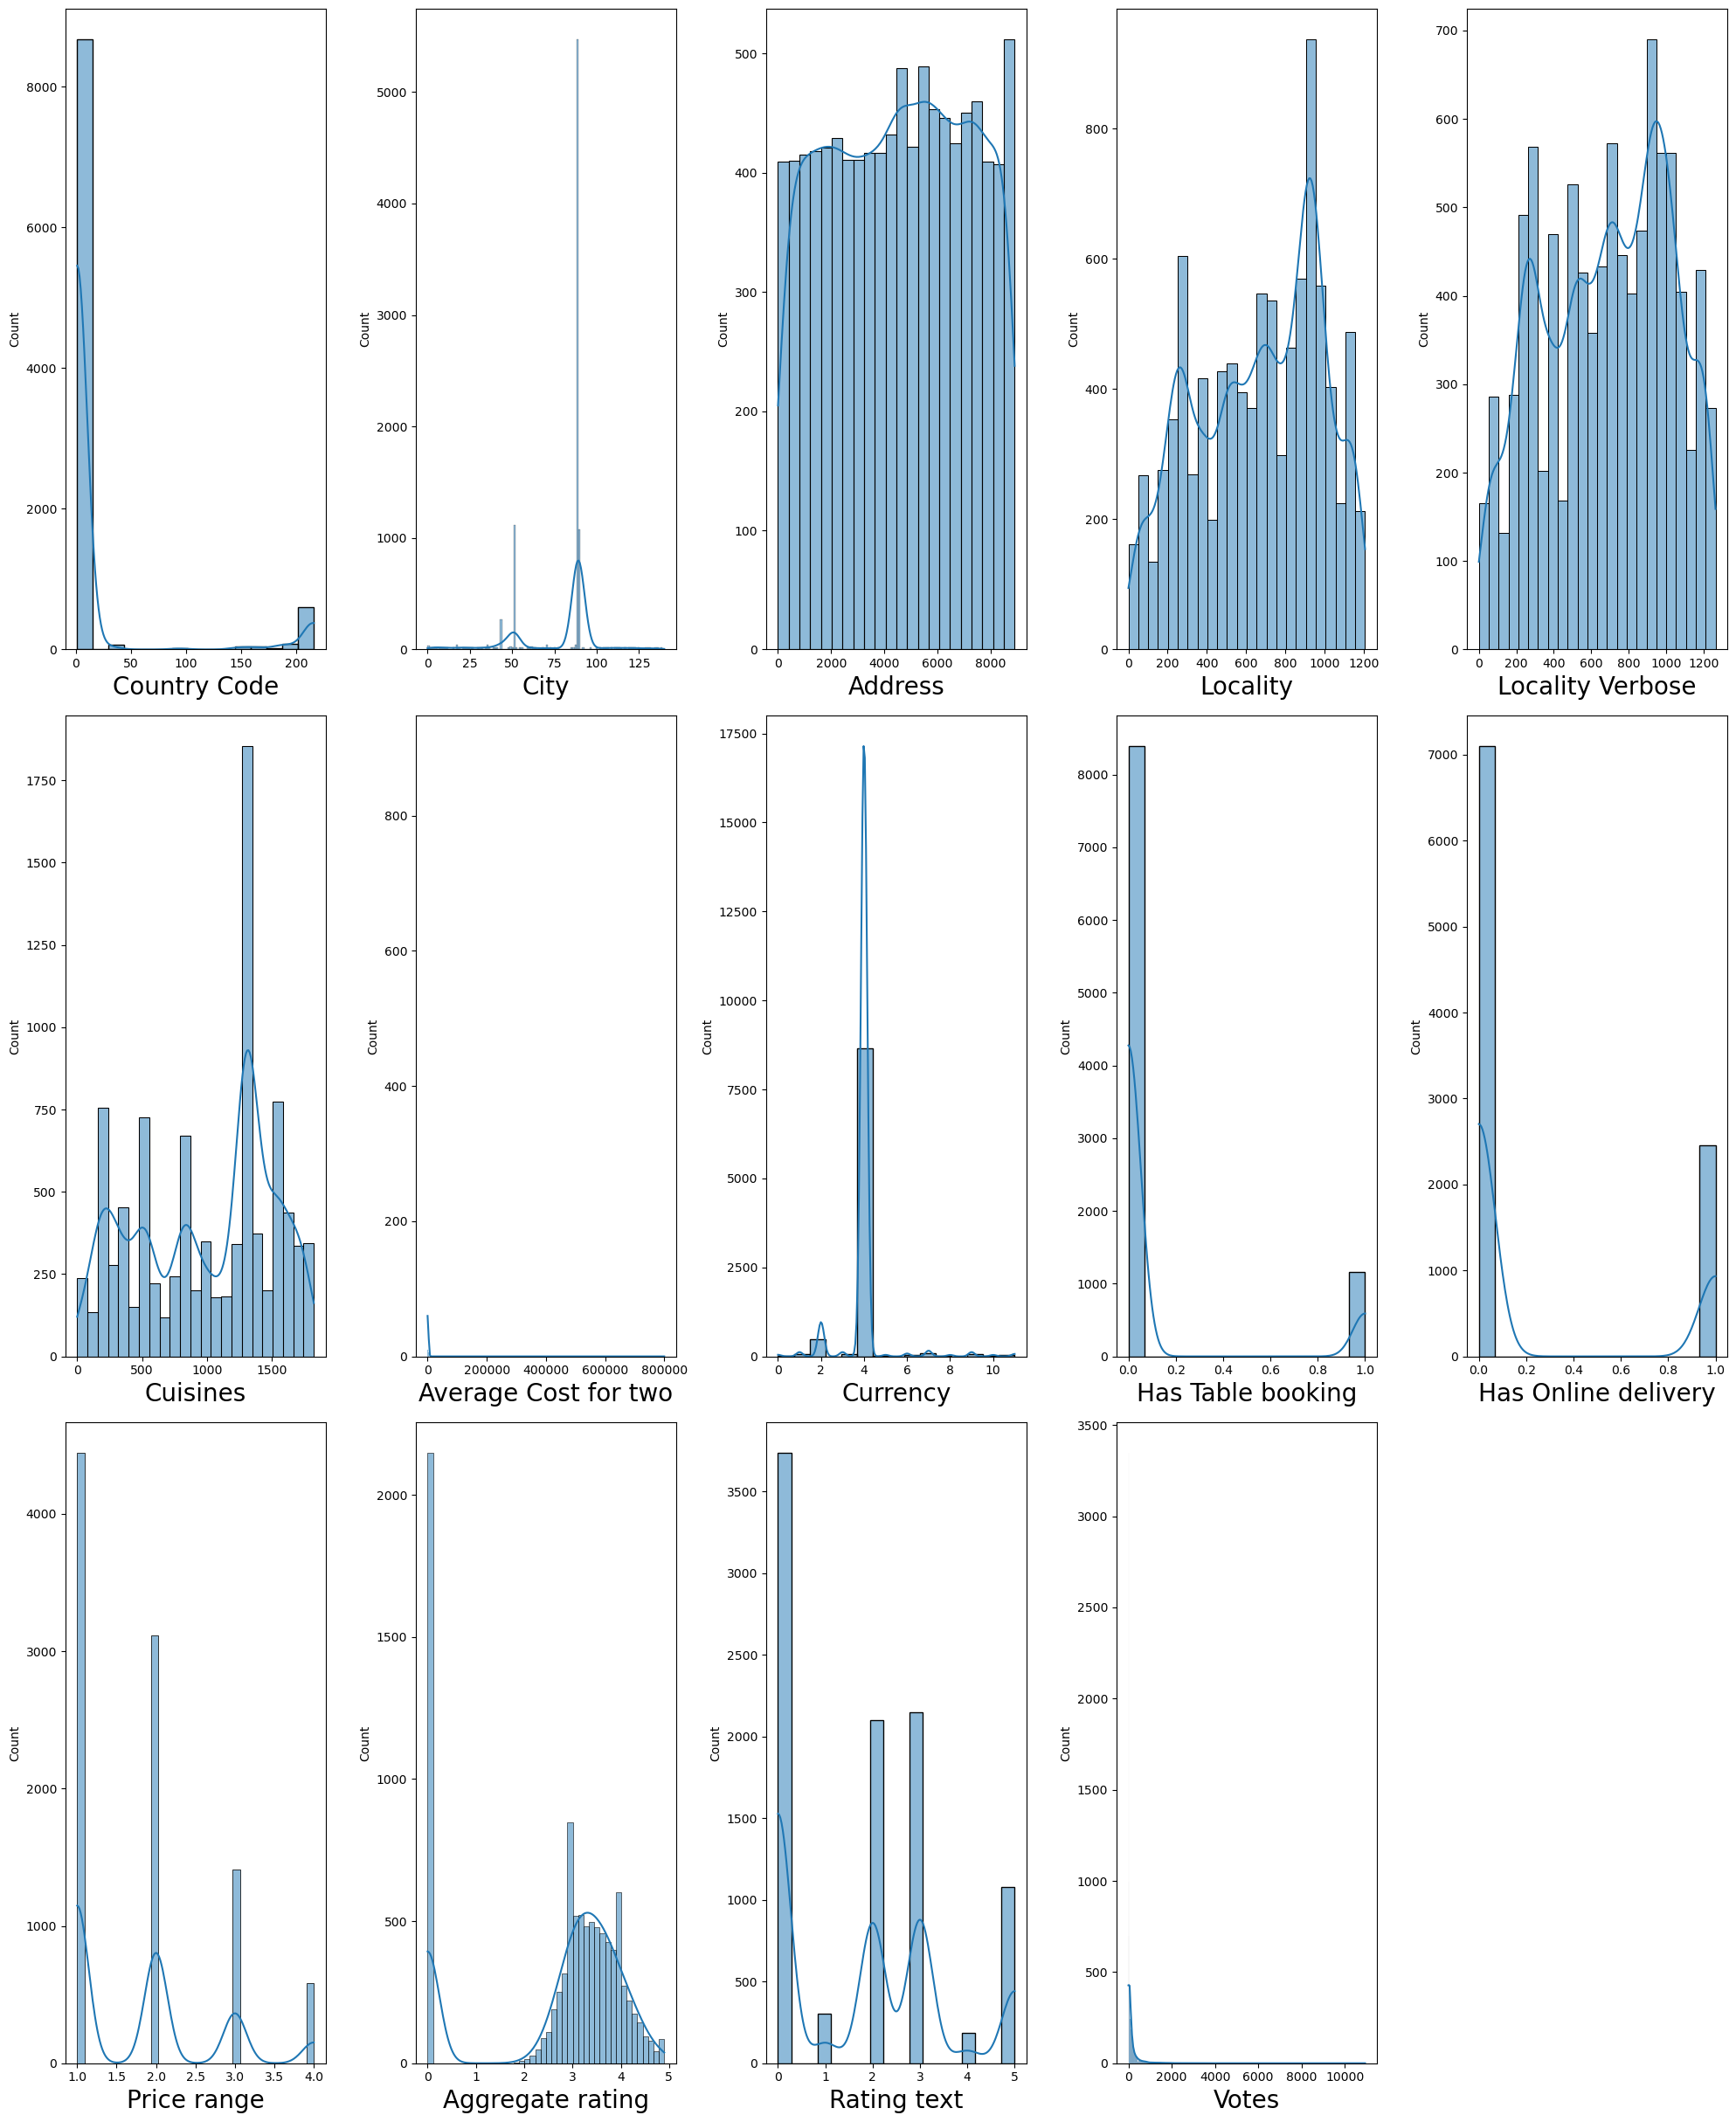

In [29]:
plt.figure(figsize = (20,40), facecolor = 'white')
plotnumber = 1

for column in zomato_df:
    if plotnumber<=21:
        ax = plt.subplot(5,5,plotnumber)
        sns.histplot(zomato_df[column],kde=True)
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

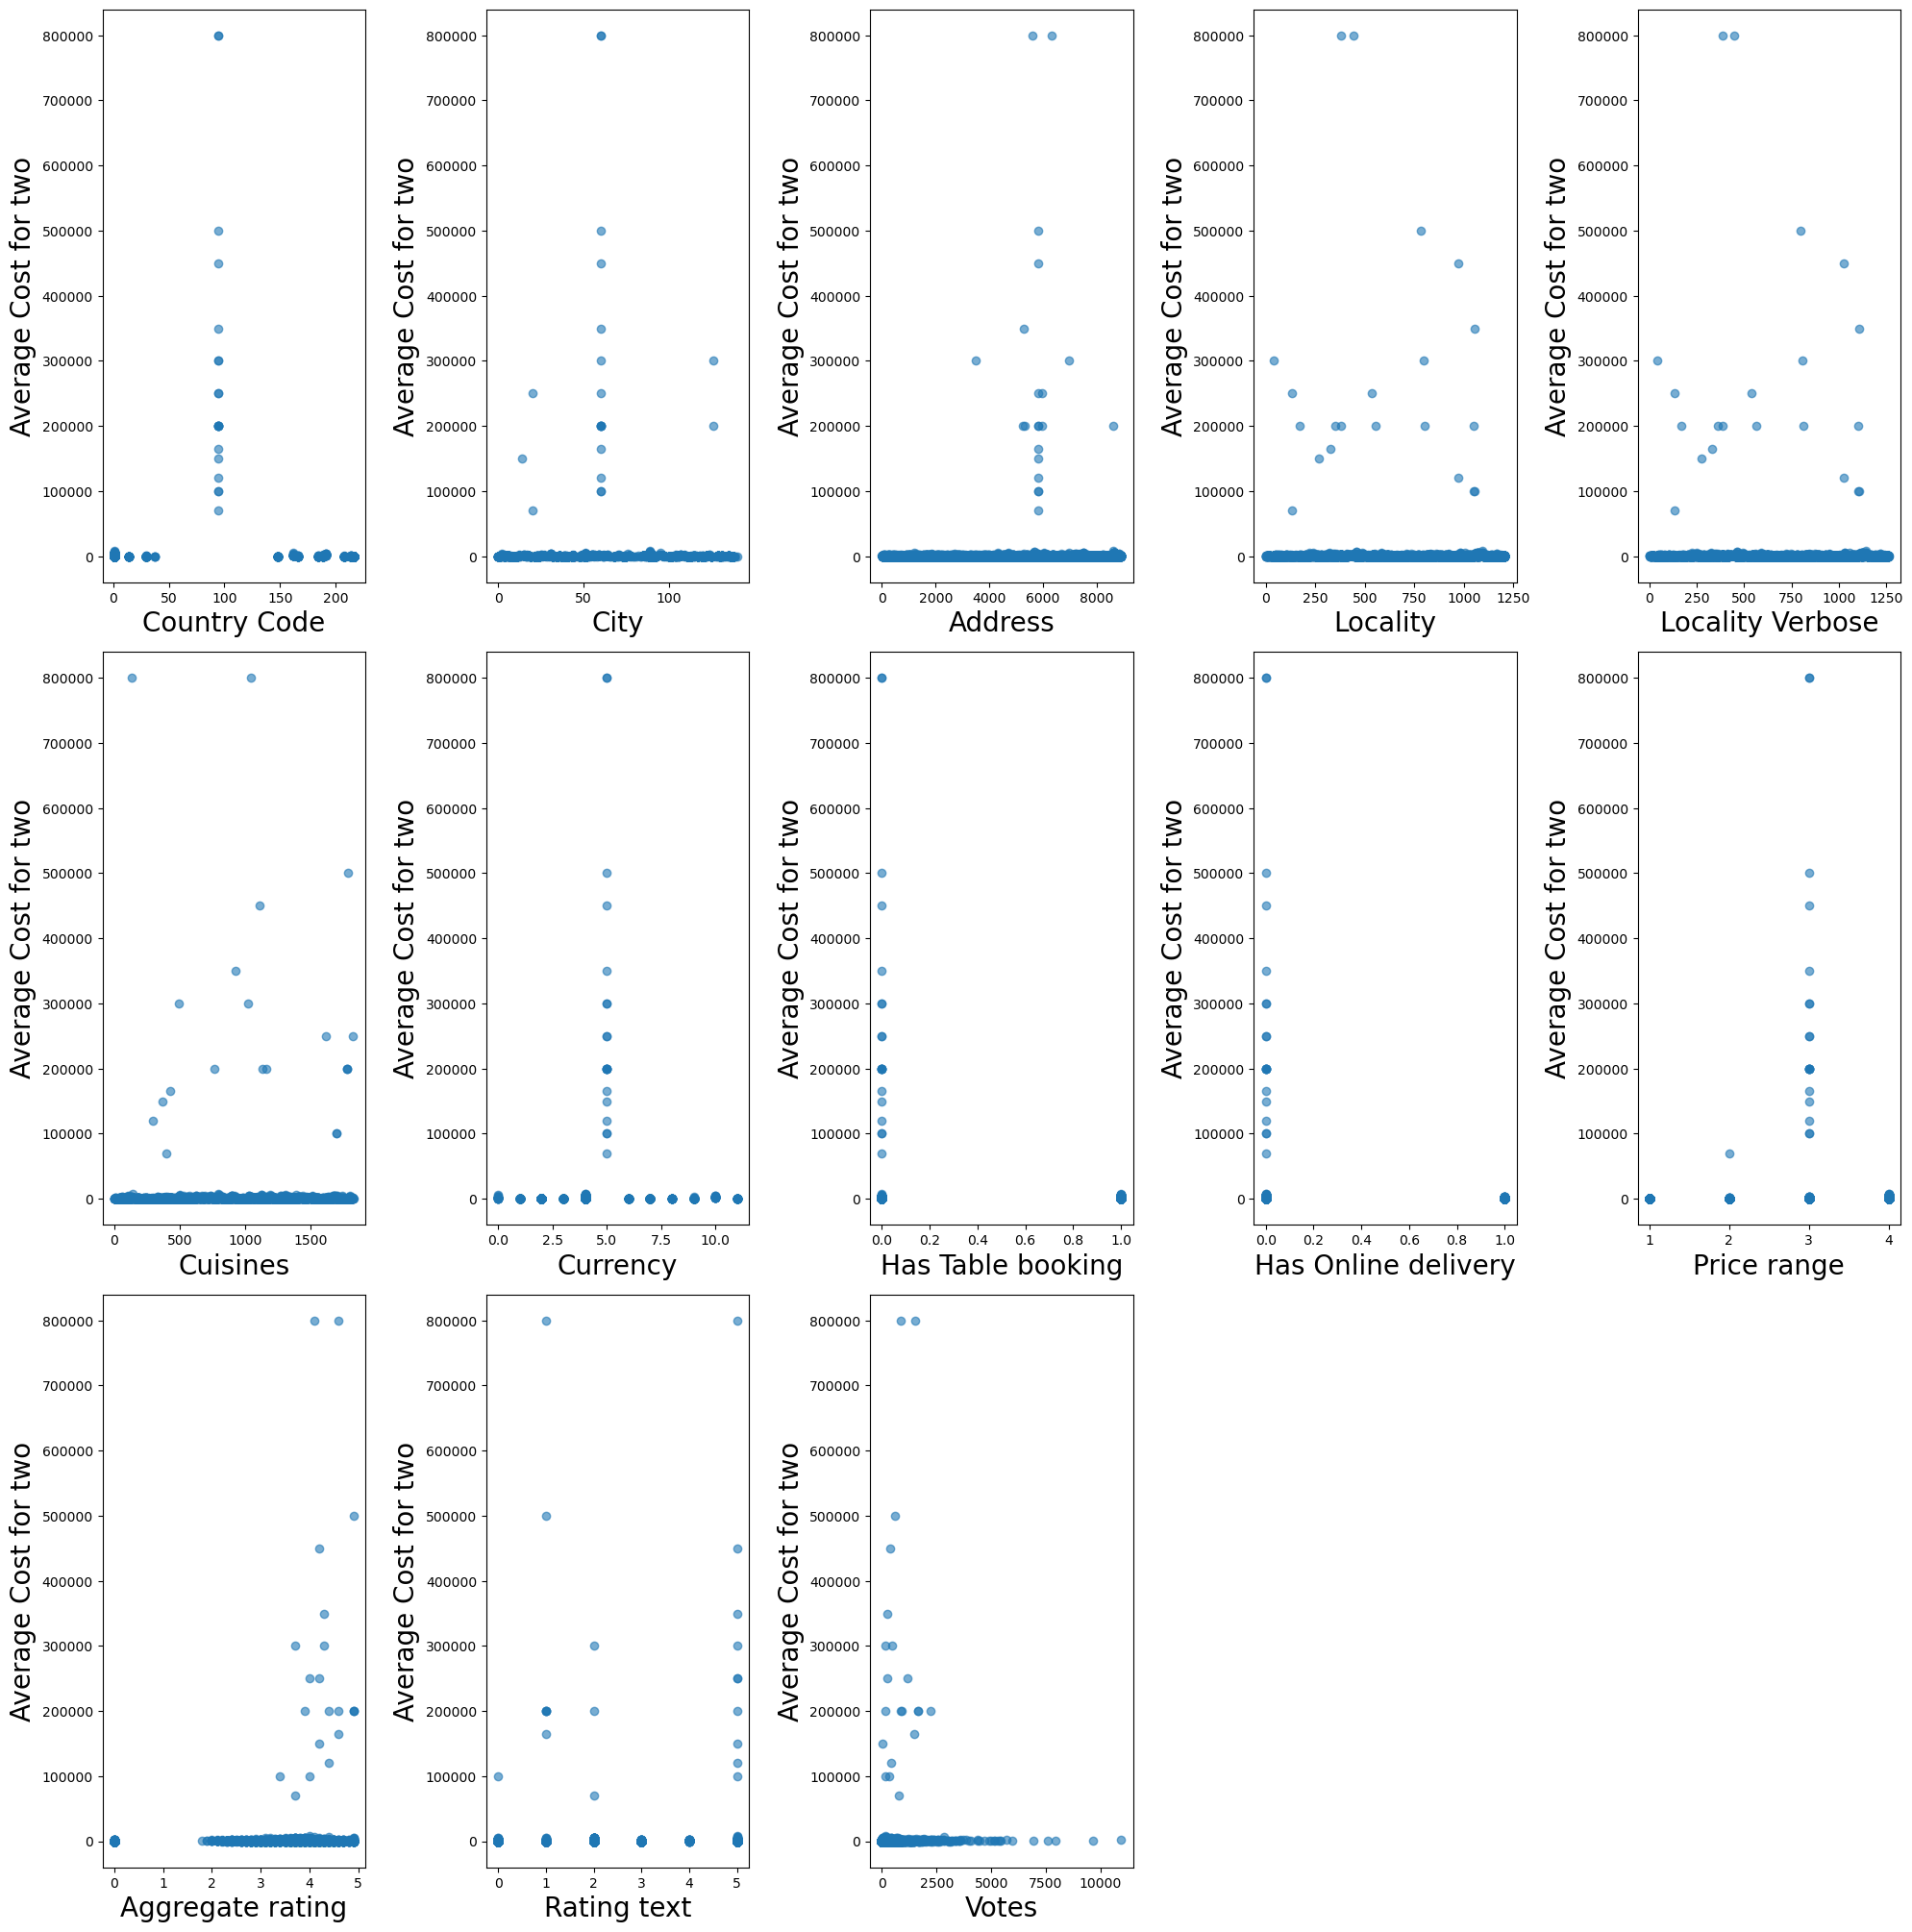

In [30]:
plt.figure(figsize=(20,33),facecolor='white')
plotnumber=1

for column in zomato_df:
    if column != 'Average Cost for two': 
            ax=plt.subplot(5,5,plotnumber)
            plt.scatter(zomato_df[column], zomato_df['Average Cost for two'], alpha=0.6)
            plt.xlabel(column, fontsize=20)
            plt.ylabel('Average Cost for two', fontsize=20)
            plotnumber += 1  

plt.tight_layout()
plt.show()

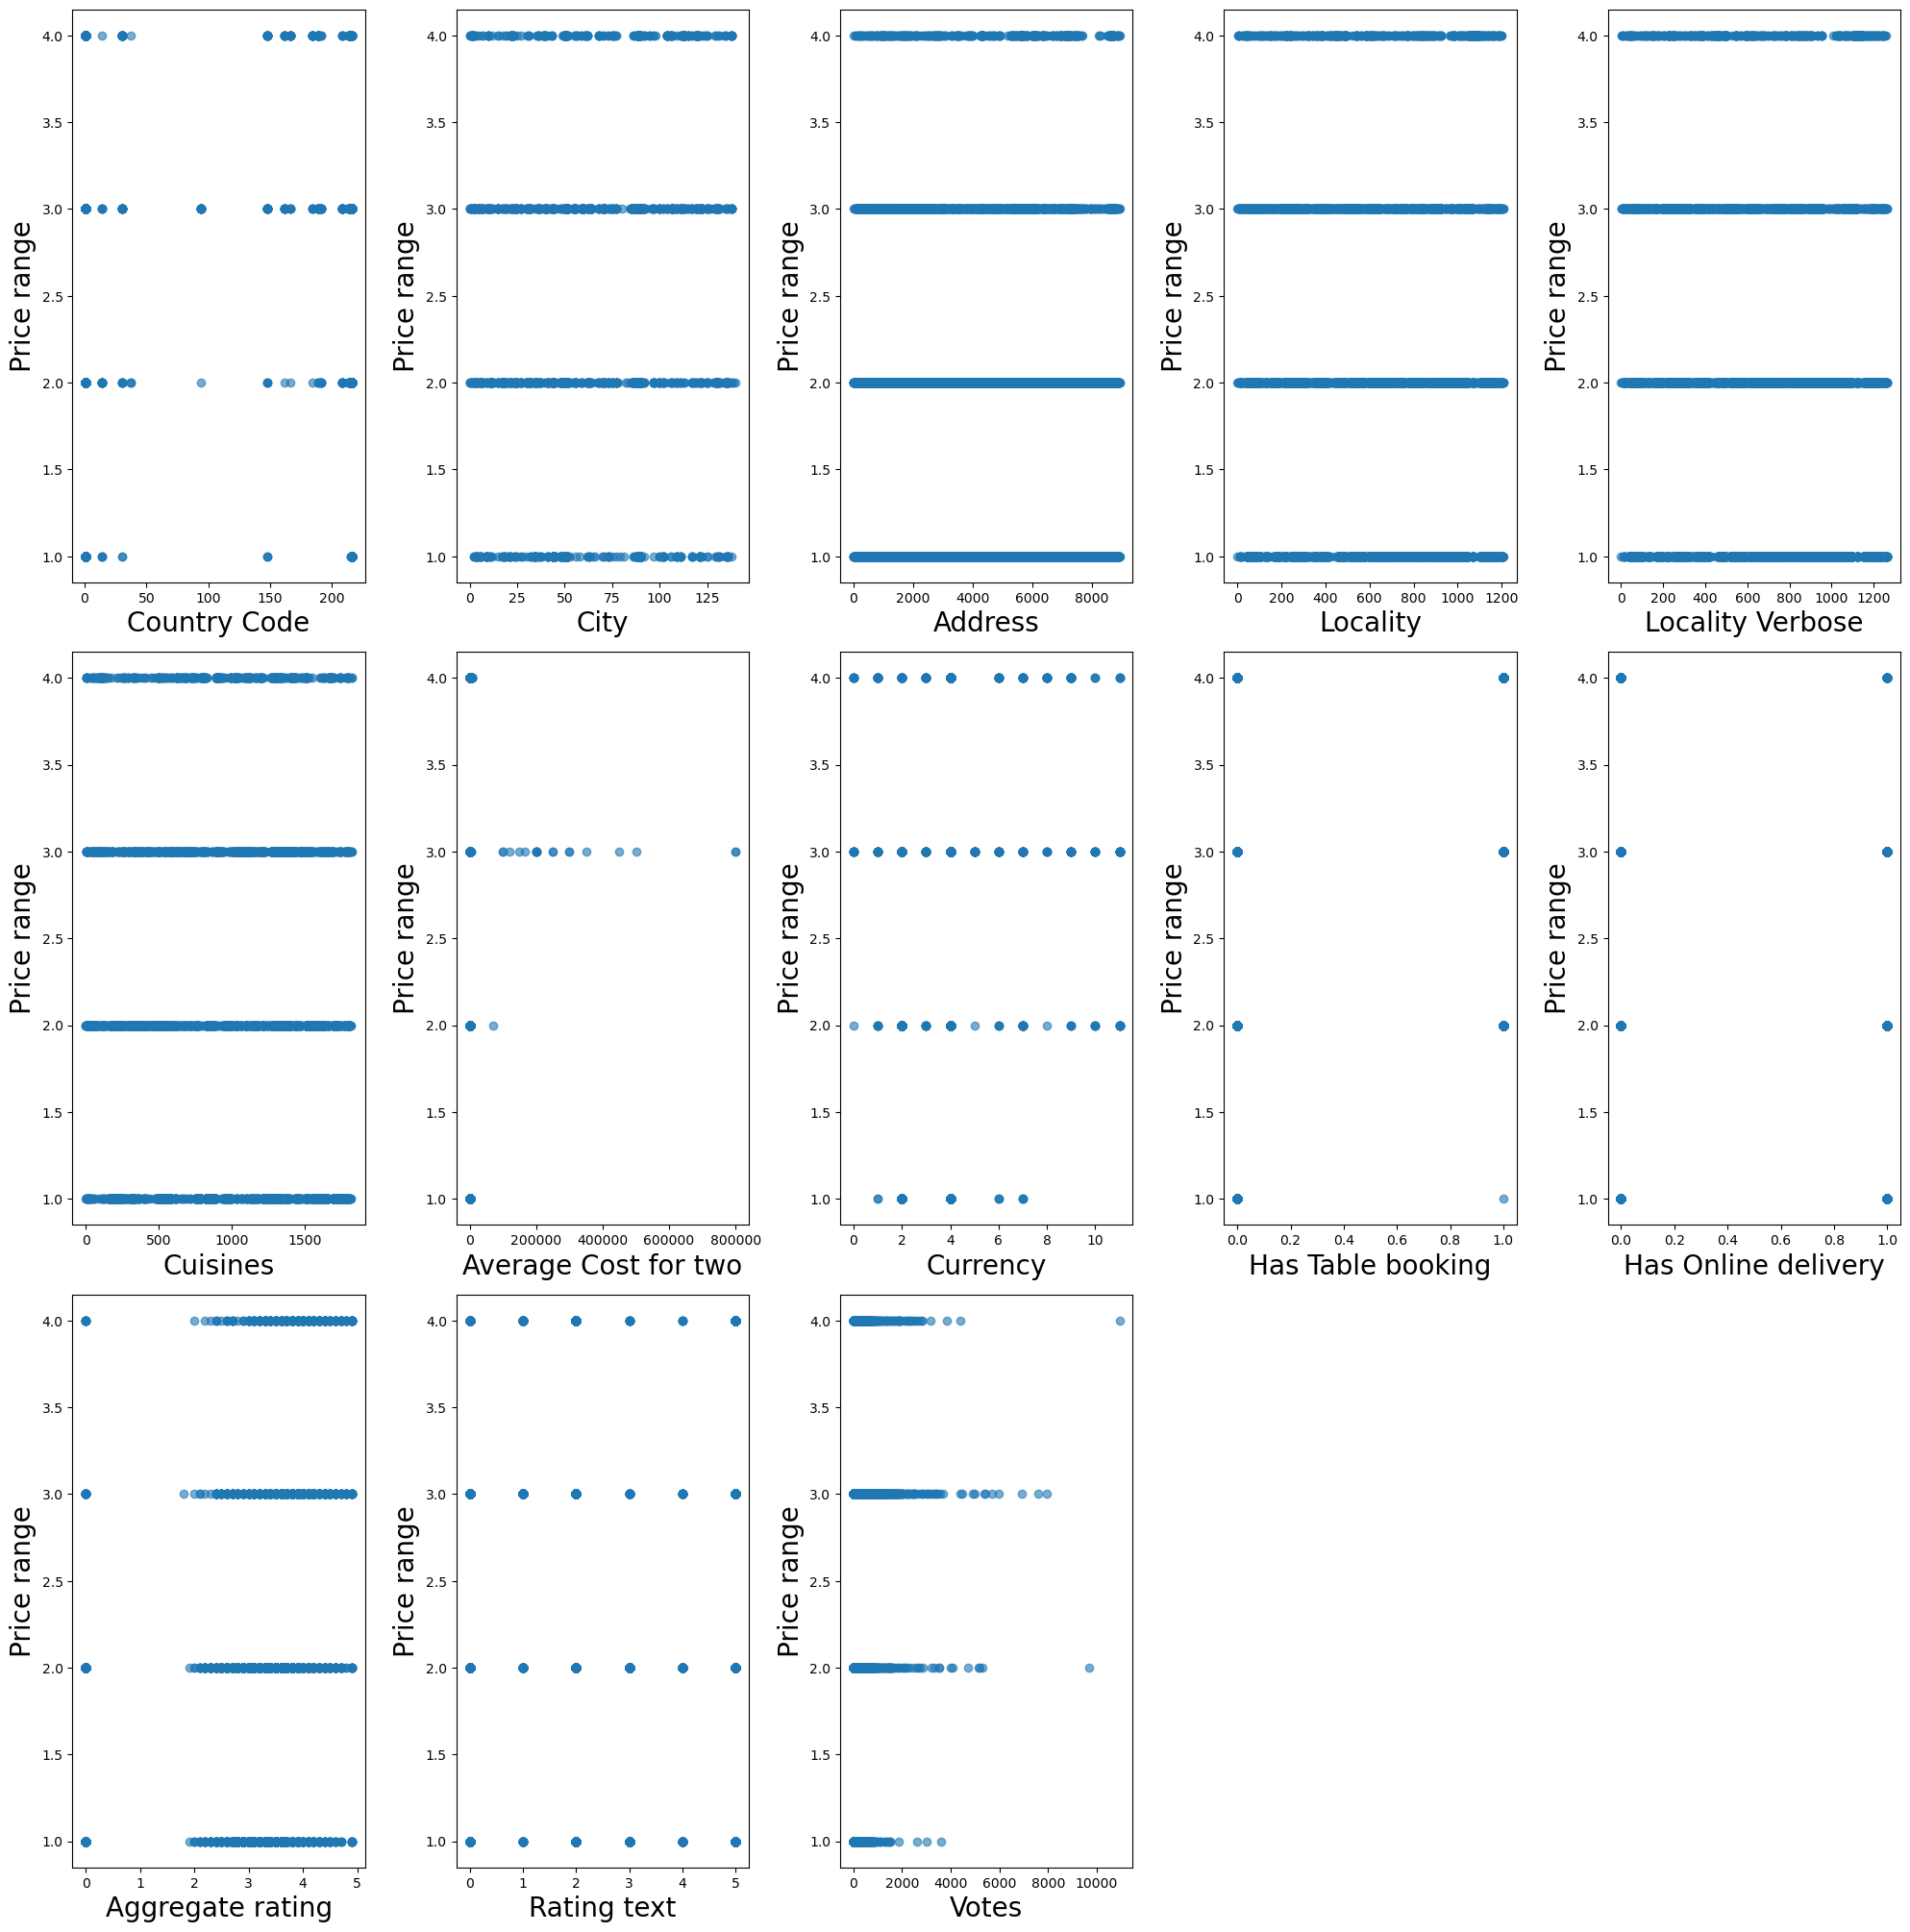

In [31]:
plt.figure(figsize=(20,33),facecolor='white')
plotnumber=1

for column in zomato_df:
    if column != 'Price range': 
            ax=plt.subplot(5,5,plotnumber)
            plt.scatter(zomato_df[column], zomato_df['Price range'], alpha=0.6)
            plt.xlabel(column, fontsize=20)
            plt.ylabel('Price range', fontsize=20)
            plotnumber += 1  

plt.tight_layout()
plt.show()

plt.figure(figsize=(20,33),facecolor='white')
plotnumber=1

for column in zomato_df:
    if column != 'Average Cost for two': 
            ax=plt.subplot(5,5,plotnumber)
            sns.countplot(x=zomato_df[column],hue=zomato_df['Average Cost for two'])
            plt.xlabel(column)
            plotnumber += 1  

plt.tight_layout()
plt.show()

plt.figure(figsize=(20,33),facecolor='white')
plotnumber=1

for column in zomato_df:
    if column != 'Price range': 
            ax=plt.subplot(5,5,plotnumber)
            sns.countplot(x=zomato_df[column],hue=zomato_df['Price range'])
            plt.xlabel(column)
            plotnumber += 1  

plt.tight_layout()
plt.show()

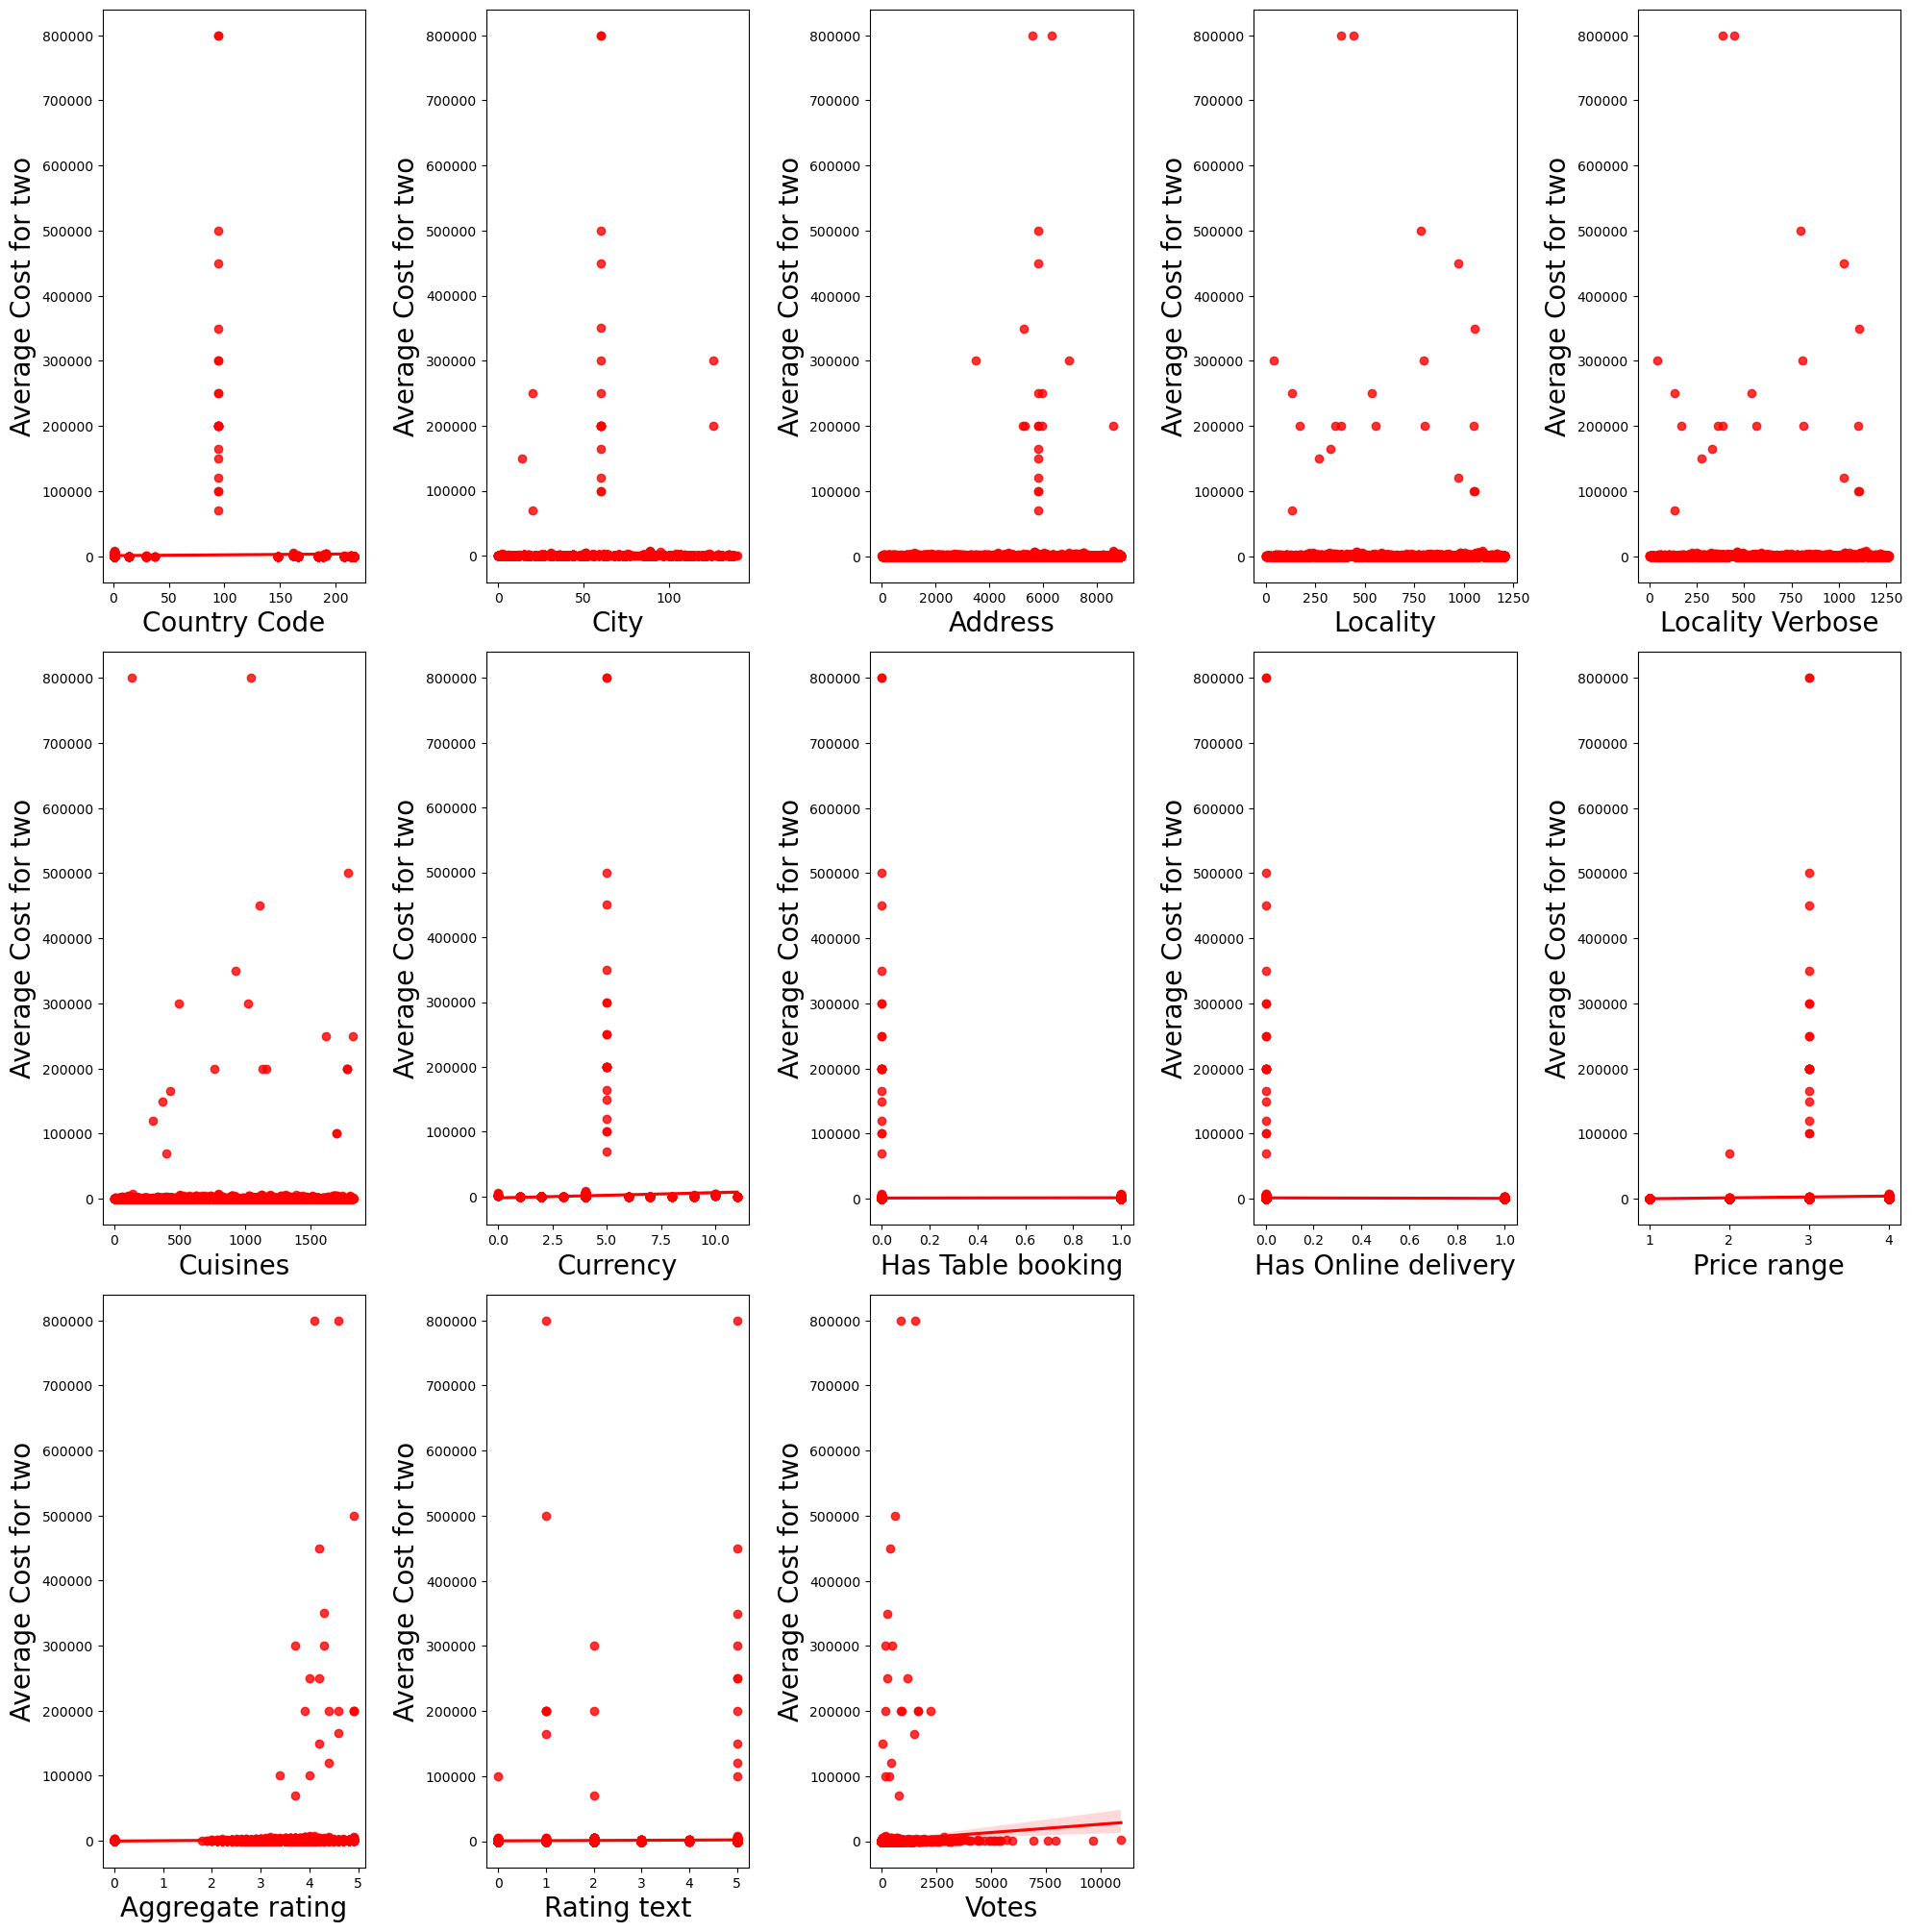

In [32]:
plt.figure(figsize=(20,33),facecolor='white')
plotnumber=1

for column in zomato_df:
    if column != 'Average Cost for two': 
            ax=plt.subplot(5,5,plotnumber)
            sns.regplot(x=zomato_df[column],y=zomato_df['Average Cost for two'], color='r')
            plt.xlabel(column, fontsize=20)
            plt.ylabel('Average Cost for two', fontsize=20)
            plotnumber += 1  

plt.tight_layout()
plt.show()

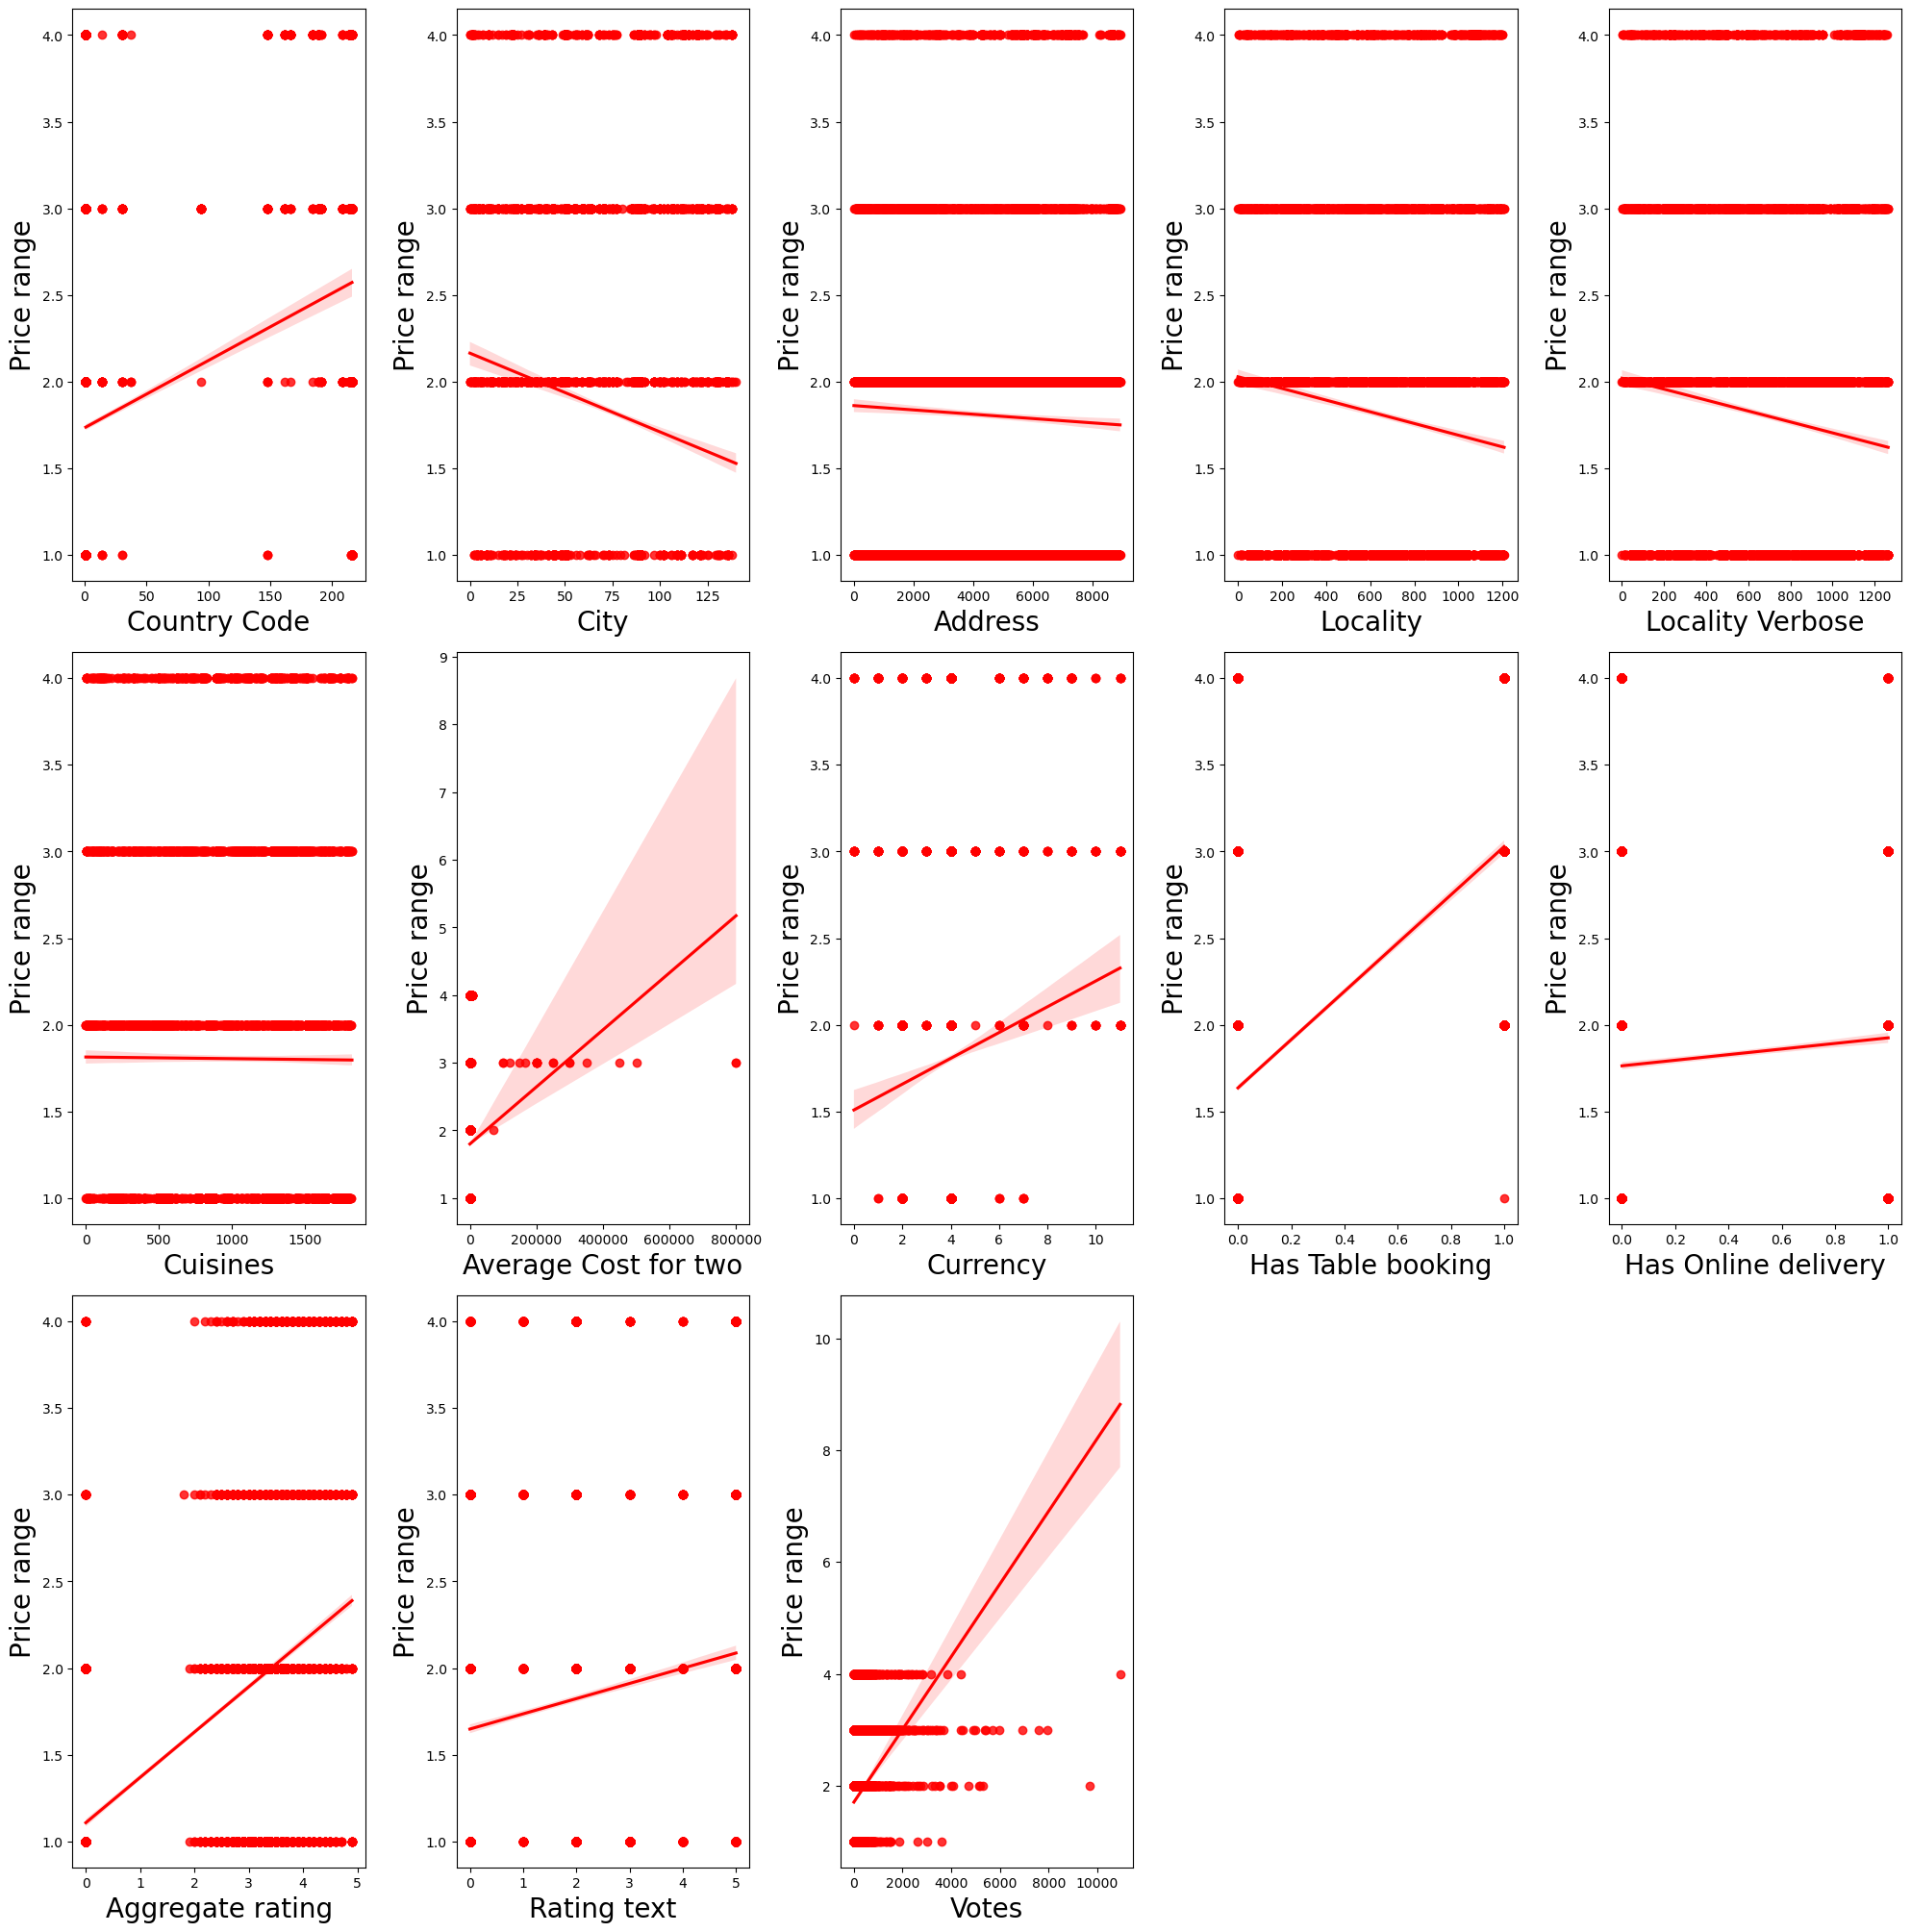

In [33]:
plt.figure(figsize=(20,33),facecolor='white')
plotnumber=1

for column in zomato_df:
    if column != 'Price range': 
            ax=plt.subplot(5,5,plotnumber)
            sns.regplot(x=zomato_df[column],y=zomato_df['Price range'], color='r')
            plt.xlabel(column, fontsize=20)
            plt.ylabel('Price range', fontsize=20)
            plotnumber += 1  

plt.tight_layout()
plt.show()

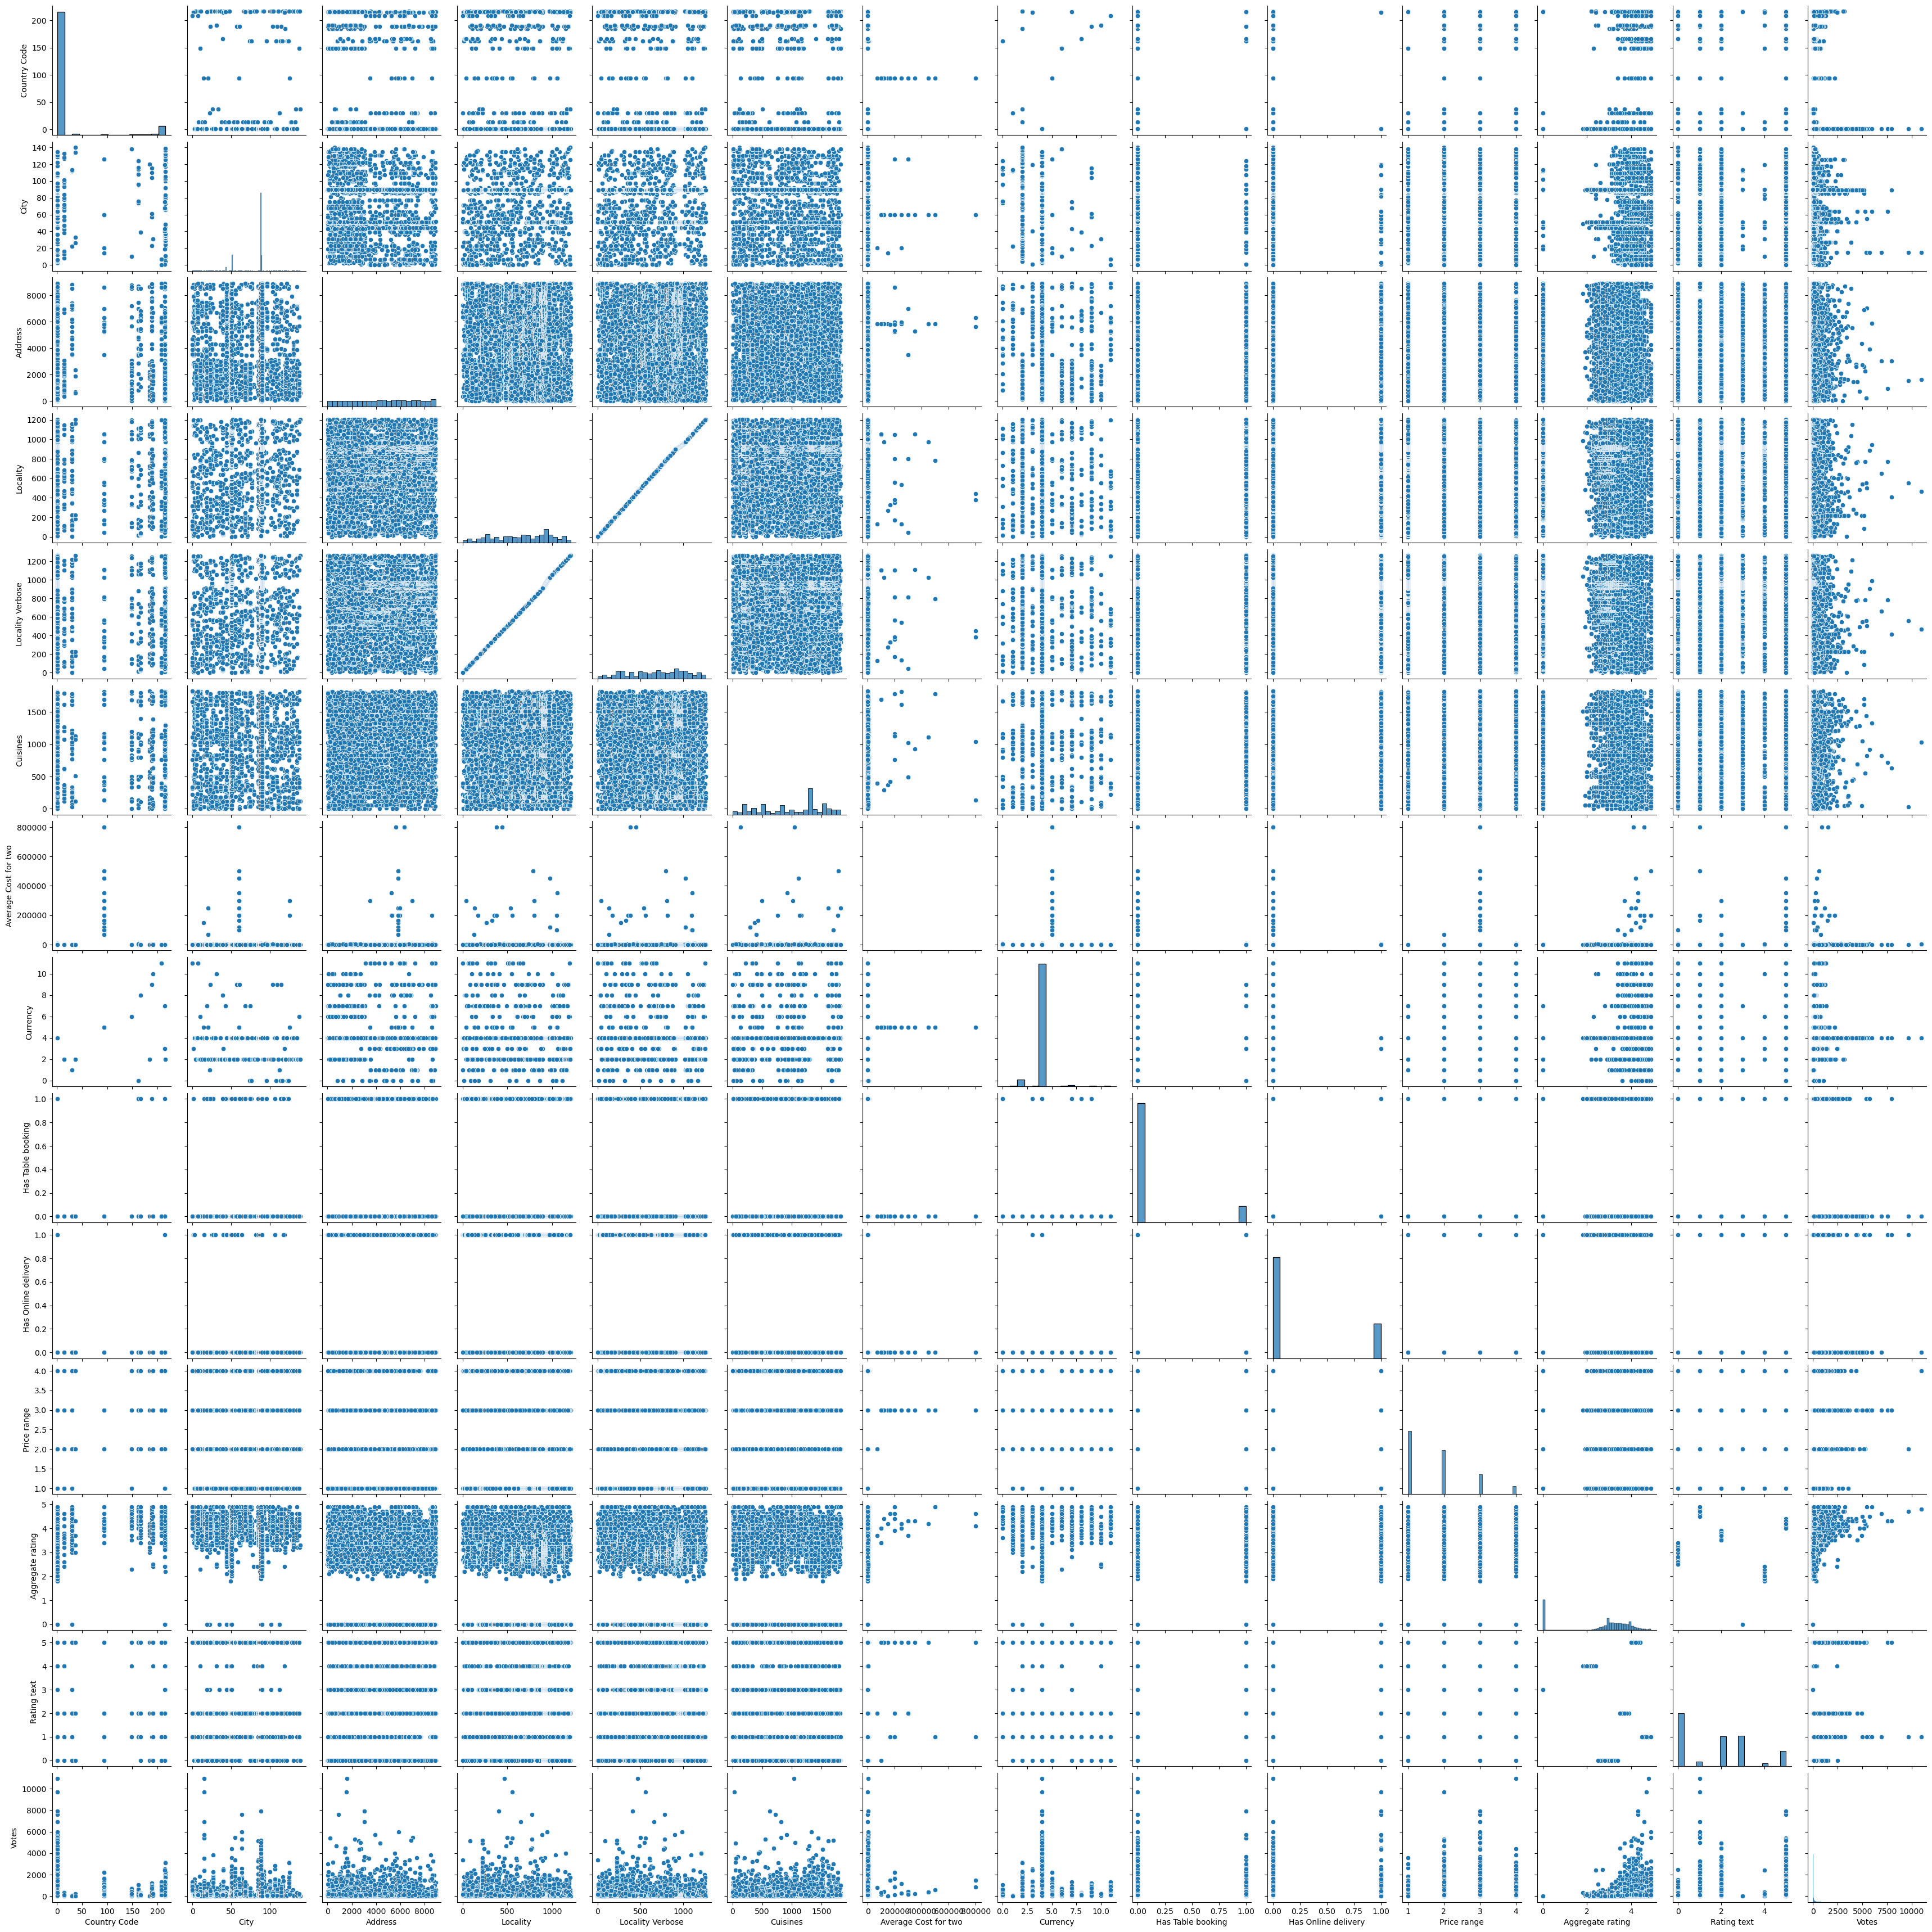

In [34]:
sns.pairplot(zomato_df)

Country Code               Axes(0.125,0.747241;0.133621x0.132759)
City                    Axes(0.285345,0.747241;0.133621x0.132759)
Address                  Axes(0.44569,0.747241;0.133621x0.132759)
Locality                Axes(0.606034,0.747241;0.133621x0.132759)
Locality Verbose        Axes(0.766379,0.747241;0.133621x0.132759)
Cuisines                   Axes(0.125,0.587931;0.133621x0.132759)
Average Cost for two    Axes(0.285345,0.587931;0.133621x0.132759)
Currency                 Axes(0.44569,0.587931;0.133621x0.132759)
Has Table booking       Axes(0.606034,0.587931;0.133621x0.132759)
Has Online delivery     Axes(0.766379,0.587931;0.133621x0.132759)
Price range                Axes(0.125,0.428621;0.133621x0.132759)
Aggregate rating        Axes(0.285345,0.428621;0.133621x0.132759)
Rating text              Axes(0.44569,0.428621;0.133621x0.132759)
Votes                   Axes(0.606034,0.428621;0.133621x0.132759)
dtype: object

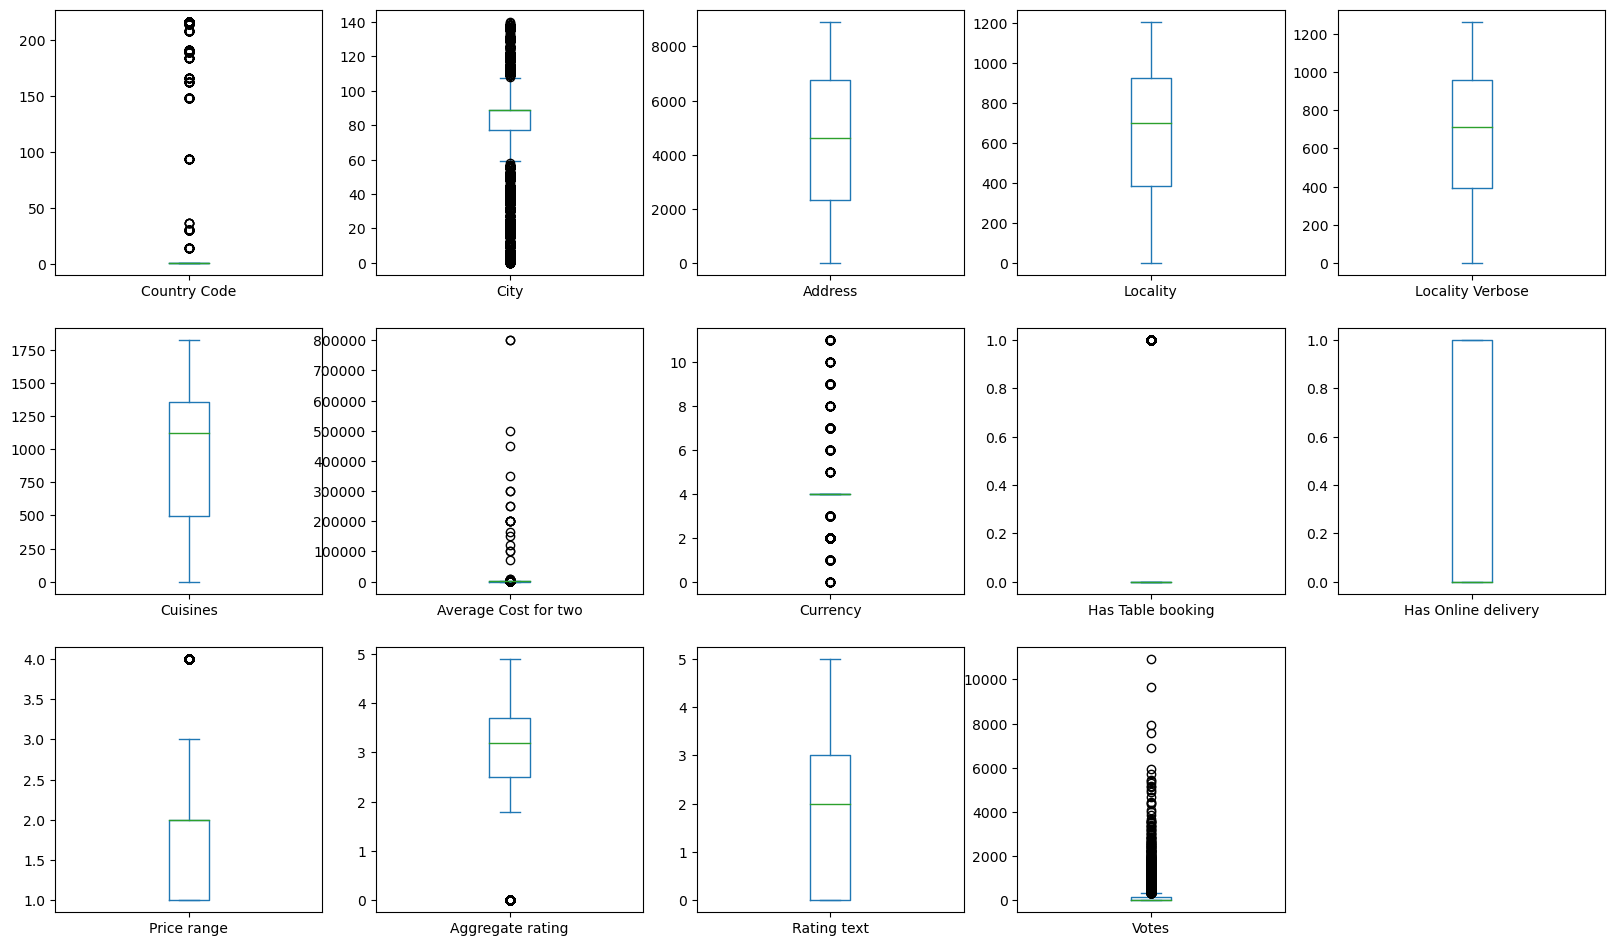

In [35]:
zomato_df.plot(kind='box',subplots=True,layout=(5,5),figsize=(20,20))

In [36]:
from scipy.stats import zscore
out_liers=zomato_df[['Country Code','City','Votes']]
z=np.abs(zscore(out_liers))
z

Country Code      City     Votes
0         2.531111  0.218706  0.365202
1         2.531111  0.218706  1.009168
2         2.531111  0.132740  0.262911
3         2.531111  0.132740  0.483766
4         2.531111  0.132740  0.167595
...            ...       ...       ...
9546      3.341718  3.399479  1.467151
9547      3.341718  3.399479  2.039049
9548      3.341718  3.399479  1.171903
9549      3.341718  3.399479  1.729853
9550      3.341718  3.399479  1.009168

[9551 rows x 3 columns]

In [37]:
np.where(z>3)

(array([  82,   82,   83, ..., 9549, 9550, 9550]),
 array([0, 1, 0, ..., 1, 0, 1]))

In [38]:
 data=zomato_df[(z<3).all(axis=1)]
data.shape

(8626, 14)

In [39]:
print("dataloss",((zomato_df.shape[0]-data.shape[0])/zomato_df.shape[0])*100)

dataloss 9.684849753952465


In [40]:
data.skew().sort_values(ascending=False)

Average Cost for two    37.052649
Country Code             8.449456
Votes                    3.641784
Has Table booking        2.287959
Price range              1.021039
Has Online delivery      1.018533
Rating text              0.433278
Address                 -0.126741
Locality Verbose        -0.240379
Locality                -0.314907
Cuisines                -0.332246
Aggregate rating        -0.872690
City                    -1.273167
Currency                -2.513166
dtype: float64

In [41]:
data[['Average Cost for two','Votes','Country Code','Has Table booking']]=np.cbrt(data[['Average Cost for two','Votes','Country Code','Has Table booking']])

In [42]:
data.skew().sort_values(ascending=False)

Average Cost for two    10.985147
Country Code             7.273040
Has Table booking        2.287959
Price range              1.021039
Has Online delivery      1.018533
Votes                    0.762268
Rating text              0.433278
Address                 -0.126741
Locality Verbose        -0.240379
Locality                -0.314907
Cuisines                -0.332246
Aggregate rating        -0.872690
City                    -1.273167
Currency                -2.513166
dtype: float64

In [43]:
data[['Average Cost for two','Country Code','Has Table booking']]=np.sqrt(data[['Average Cost for two','Country Code','Has Table booking']])

In [44]:
data.skew().sort_values(ascending=False)

Country Code            6.940834
Average Cost for two    3.340134
Has Table booking       2.287959
Price range             1.021039
Has Online delivery     1.018533
Votes                   0.762268
Rating text             0.433278
Address                -0.126741
Locality Verbose       -0.240379
Locality               -0.314907
Cuisines               -0.332246
Aggregate rating       -0.872690
City                   -1.273167
Currency               -2.513166
dtype: float64

In [45]:
from sklearn.preprocessing import PowerTransformer

In [46]:
pt = PowerTransformer(method='yeo-johnson')

In [47]:
neg_skew_columns = ['Currency', 'City']
data[neg_skew_columns] = pt.fit_transform(data[neg_skew_columns])

In [48]:
data.skew().sort_values(ascending=False)

Country Code            6.940834
Average Cost for two    3.340134
Currency                2.867562
Has Table booking       2.287959
Price range             1.021039
Has Online delivery     1.018533
Votes                   0.762268
Rating text             0.433278
City                    0.131002
Address                -0.126741
Locality Verbose       -0.240379
Locality               -0.314907
Cuisines               -0.332246
Aggregate rating       -0.872690
dtype: float64

In [49]:
data.describe()

Country Code          City      Address     Locality  Locality Verbose  \
count   8626.000000  8.626000e+03  8626.000000  8626.000000       8626.000000   
mean       1.025022 -1.317955e-16  4715.265245   677.265824        696.920357   
std        0.167178  1.000058e+00  2529.159225   306.320323        322.070895   
min        1.000000 -2.378000e+00     0.000000     0.000000          0.000000   
25%        1.000000  3.371292e-01  2622.250000   426.250000        432.250000   
50%        1.000000  3.371292e-01  4838.500000   710.000000        721.000000   
75%        1.000000  3.371292e-01  6902.750000   927.750000        962.750000   
max        2.384897  5.273927e+00  8916.000000  1207.000000       1264.000000   

          Cuisines  Average Cost for two      Currency  Has Table booking  \
count  8626.000000           8626.000000  8.626000e+03        8626.000000   
mean   1005.979365              2.791645  2.728168e-15           0.123580   
std     505.433160              0.428530  1.000058e+00           0.329121   
min       0.000000              0.000000 -6.980467e+00           0.000000   
25%     518.000000              2.587340  2.177234e-02           0.000000   
50%    1235.000000              2.768229  2.177234e-02           0.000000   
75%    1374.000000              2.979772  2.177234e-02           0.000000   
max    1822.000000              9.634925  1.263151e+01           1.000000   

       Has Online delivery  Price range  Aggregate rating  Rating text  \
count          8626.000000  8626.000000       8626.000000  8626.000000   
mean              0.273128     1.730234          2.517123     1.652330   
std               0.445592     0.868199          1.513028     1.620461   
min               0.000000     1.000000          0.000000     0.000000   
25%               0.000000     1.000000          2.100000     0.000000   
50%               0.000000     2.000000          3.100000     2.000000   
75%               1.000000     2.000000          3.600000     3.000000   
max               1.000000     4.000000          4.900000     5.000000   

             Votes  
count  8626.000000  
mean      3.205130  
std       2.315478  
min       0.000000  
25%       1.587401  
50%       2.843867  
75%       4.546836  
max      11.289818

In [50]:
data.corr()

Country Code      City   Address  Locality  \
Country Code              1.000000  0.107041 -0.029088 -0.032928   
City                      0.107041  1.000000 -0.104286 -0.018138   
Address                  -0.029088 -0.104286  1.000000  0.139482   
Locality                 -0.032928 -0.018138  0.139482  1.000000   
Locality Verbose         -0.031302 -0.020103  0.140960  0.999427   
Cuisines                 -0.058485  0.011962 -0.014643 -0.010651   
Average Cost for two     -0.010579 -0.100270  0.027449 -0.062871   
Currency                  0.016798 -0.114213 -0.023849  0.024726   
Has Table booking        -0.013995 -0.022589 -0.011267 -0.070358   
Has Online delivery      -0.091752 -0.049377 -0.006136 -0.045281   
Price range               0.265597 -0.018714 -0.013901 -0.099347   
Aggregate rating          0.148502 -0.026744 -0.104525 -0.150037   
Rating text               0.101963 -0.002692  0.044683  0.001012   
Votes                     0.110293 -0.041909 -0.127342 -0.177672   

                      Locality Verbose  Cuisines  Average Cost for two  \
Country Code                 -0.031302 -0.058485             -0.010579   
City                         -0.020103  0.011962             -0.100270   
Address                       0.140960 -0.014643              0.027449   
Locality                      0.999427 -0.010651             -0.062871   
Locality Verbose              1.000000 -0.011628             -0.061638   
Cuisines                     -0.011628  1.000000              0.015724   
Average Cost for two         -0.061638  0.015724              1.000000   
Currency                      0.025710  0.042142              0.065428   
Has Table booking            -0.069747  0.044865              0.492063   
Has Online delivery          -0.045708 -0.035332              0.156652   
Price range                  -0.097085  0.006062              0.684667   
Aggregate rating             -0.149384 -0.058206              0.328294   
Rating text                   0.002316 -0.065702              0.045389   
Votes                        -0.176152 -0.036446              0.450579   

                      Currency  Has Table booking  Has Online delivery  \
Country Code          0.016798          -0.013995            -0.091752   
City                 -0.114213          -0.022589            -0.049377   
Address              -0.023849          -0.011267            -0.006136   
Locality              0.024726          -0.070358            -0.045281   
Locality Verbose      0.025710          -0.069747            -0.045708   
Cuisines              0.042142           0.044865            -0.035332   
Average Cost for two  0.065428           0.492063             0.156652   
Currency              1.000000          -0.021915             0.013346   
Has Table booking    -0.021915           1.000000             0.081308   
Has Online delivery   0.013346           0.081308             1.000000   
Price range          -0.026926           0.554496             0.110459   
Aggregate rating     -0.008215           0.213283             0.281751   
Rating text           0.016942           0.045787            -0.066298   
Votes                 0.043037           0.334869             0.334872   

                      Price range  Aggregate rating  Rating text     Votes  
Country Code             0.265597          0.148502     0.101963  0.110293  
City                    -0.018714         -0.026744    -0.002692 -0.041909  
Address                 -0.013901         -0.104525     0.044683 -0.127342  
Locality                -0.099347         -0.150037     0.001012 -0.177672  
Locality Verbose        -0.097085         -0.149384     0.002316 -0.176152  
Cuisines                 0.006062         -0.058206    -0.065702 -0.036446  
Average Cost for two     0.684667          0.328294     0.045389  0.450579  
Currency                -0.026926         -0.008215     0.016942  0.043037  
Has Table booking        0.554496          0.213283     0.045787  0.334869  
Has Onlin

In [51]:
x = data.drop(['Average Cost for two','Price range'], axis =1)
y_ac =data['Average Cost for two']
y_pr =data['Price range']

In [52]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
                        for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

VIF values             Features
0     1.094223         Country Code
1     1.045468                 City
2     1.052659              Address
3   883.254187             Locality
4   883.217466     Locality Verbose
5     1.022933             Cuisines
6     1.026368             Currency
7     1.142363    Has Table booking
8     1.161118  Has Online delivery
9     3.190125     Aggregate rating
10    1.399600          Rating text
11    3.163078                Votes

In [54]:
data = data.drop(['Locality Verbose','Locality'], axis=1)

In [55]:
x_train, x_test, y_train_ac, y_test_ac = train_test_split(x, y_ac,test_size=.30,random_state=65)
print('Training size:',x_train.shape)
print('Training target size:',y_train_ac.shape)
print('Test size:',x_test.shape)
print('Test target size:',y_test_ac.shape)

Training size: (6038, 12)
Training target size: (6038,)
Test size: (2588, 12)
Test target size: (2588,)


In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso,LassoCV,RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesRegressor,GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor

In [57]:
models = {
    "Linear Regression": LinearRegression(),
    "KNN": KNeighborsRegressor(),
    "Ada Boost Regressor": AdaBoostRegressor(),
    "SV": SVR(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Extra Trees Regressor": ExtraTreesRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "Lassocv":LassoCV(),
    "Ridgecv":RidgeCV()
}

In [58]:
for model_name,model in models.items():
    model.fit(x_train, y_train_ac)
    model.score(x_test,y_test_ac)
    pred = model.predict(x_test)
    pred1= model.predict(x_train)
    print(f"{model_name}")
    print("Mean absolute Error",mean_absolute_error(y_test_ac,pred))
    print("Mean squared error",mean_squared_error(y_test_ac,pred))
    print("r2 Score on test data",r2_score(y_test_ac,pred)*100)  
    print("r2 Score on training data",r2_score(y_train_ac,pred1)*100)

Linear Regression
Mean absolute Error 0.20739909095279055
Mean squared error 0.10539442607524001
r2 Score on test data 40.46653772728812
r2 Score on training data 32.61563739969693
KNN
Mean absolute Error 0.189699703548995
Mean squared error 0.06634468715604212
r2 Score on test data 62.524309141553324
r2 Score on training data 74.91230658784961
Ada Boost Regressor
Mean absolute Error 0.21457726503498759
Mean squared error 0.08313382490090519
r2 Score on test data 53.04073837082181
r2 Score on training data 58.175083727915066
SV
Mean absolute Error 0.18369790148863402
Mean squared error 0.0627754417033955
r2 Score on test data 64.54044554847765
r2 Score on training data 67.80263363205967
Random Forest Regressor
Mean absolute Error 0.15466198531452513
Mean squared error 0.04605253492240879
r2 Score on test data 73.98660486647822
r2 Score on training data 95.65995616916474
Extra Trees Regressor
Mean absolute Error 0.1673174274179451
Mean squared error 0.054360142583907846
r2 Score on test

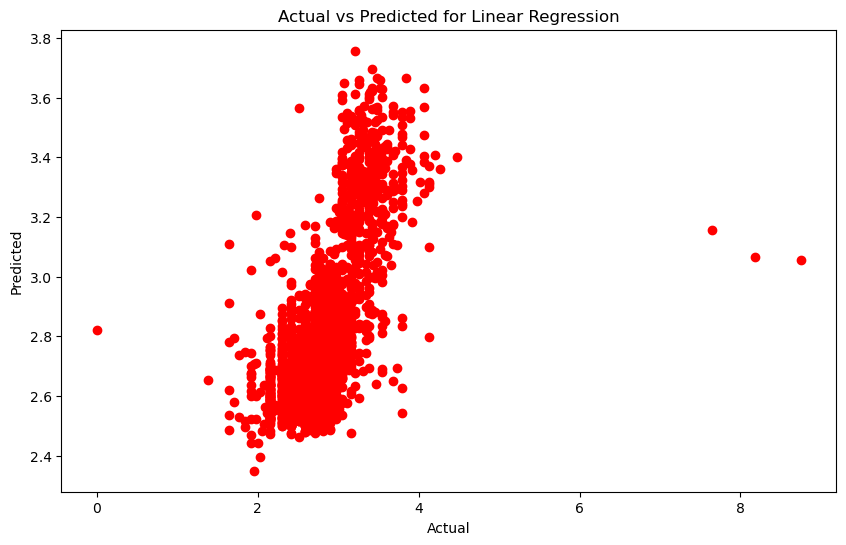

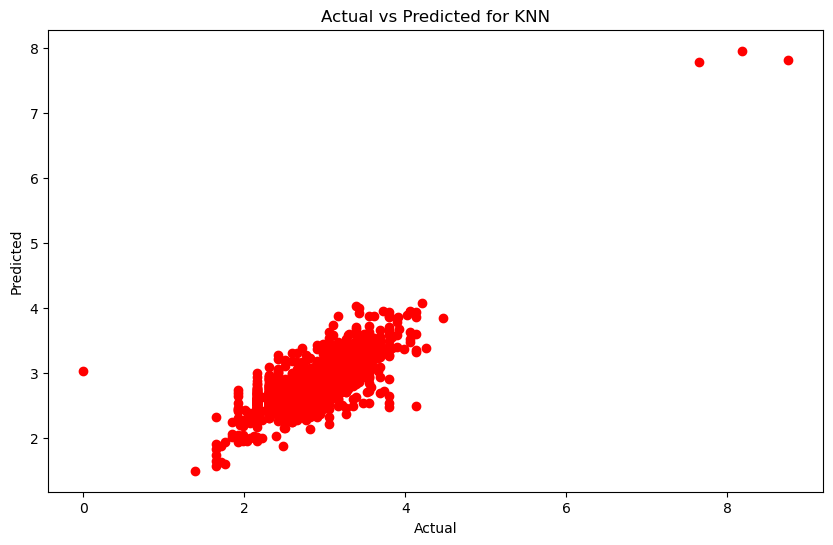

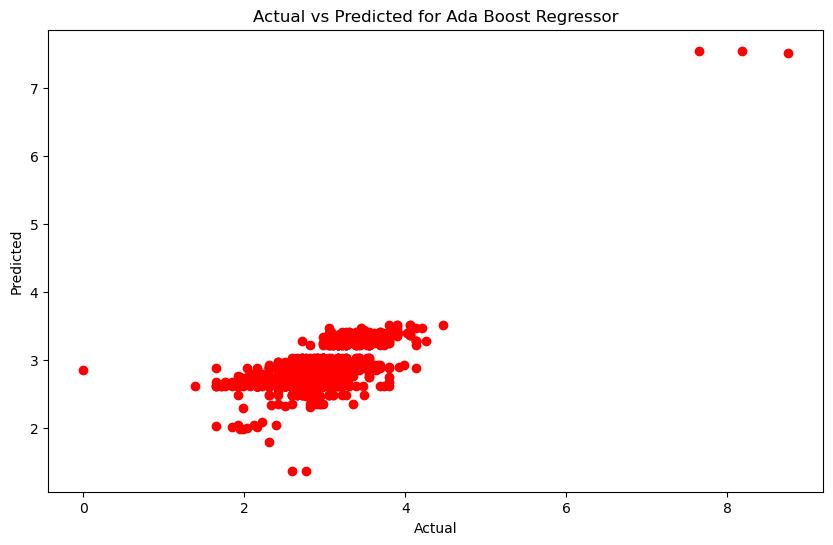

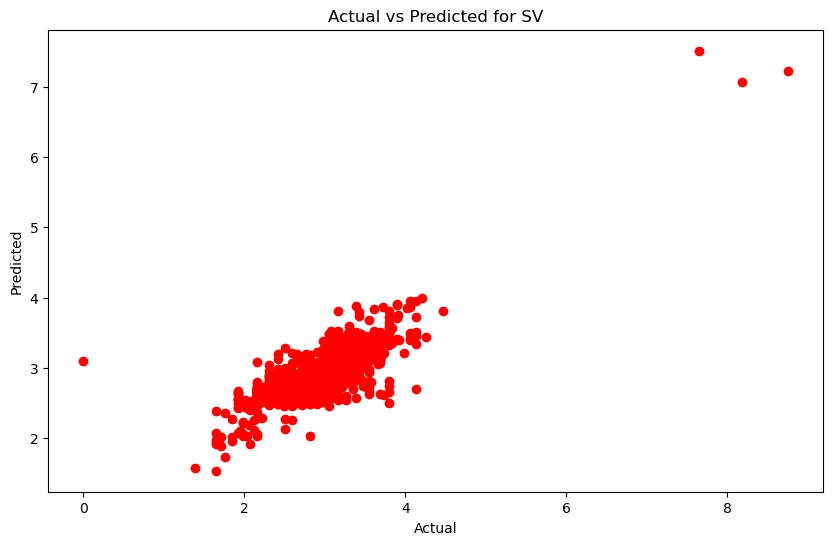

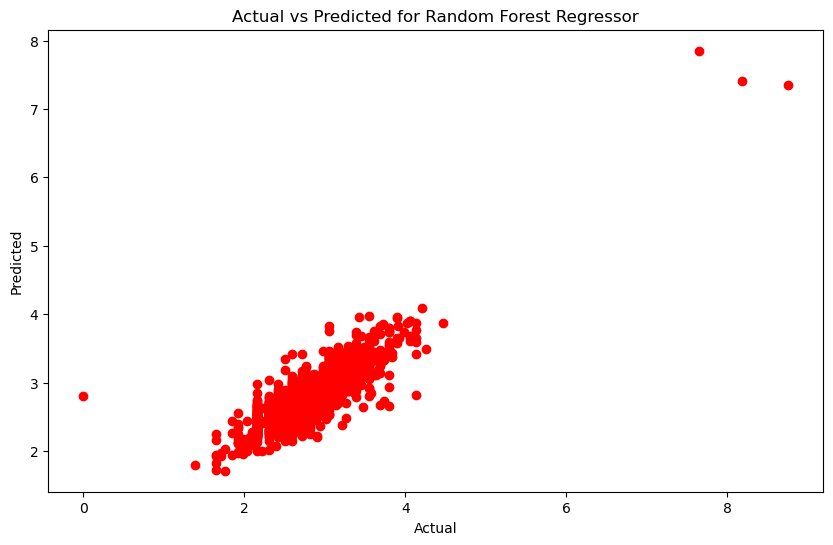

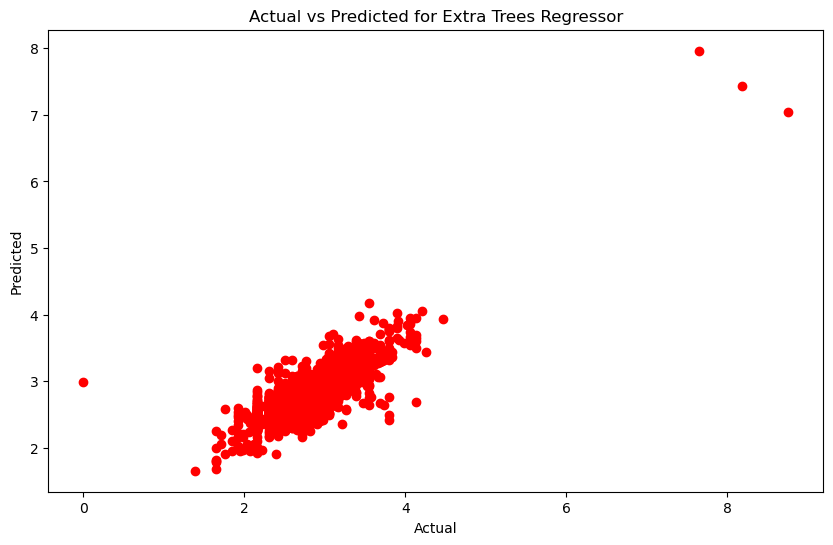

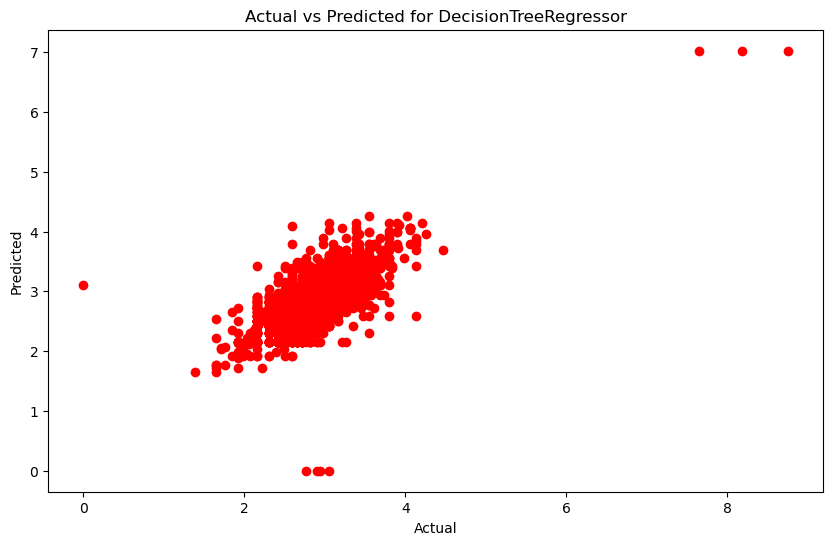

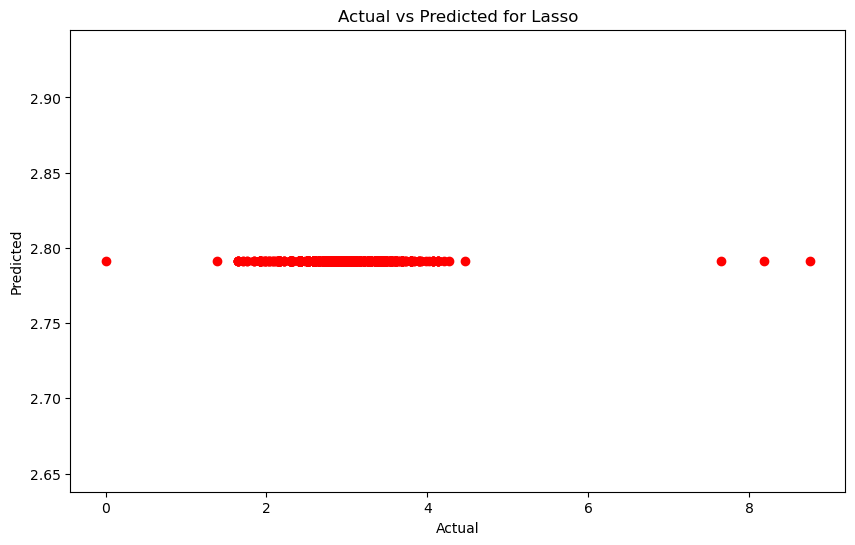

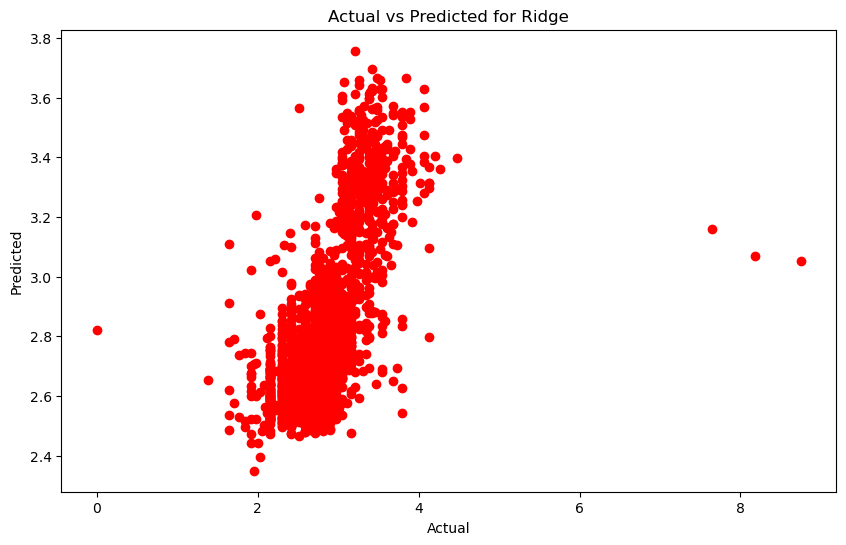

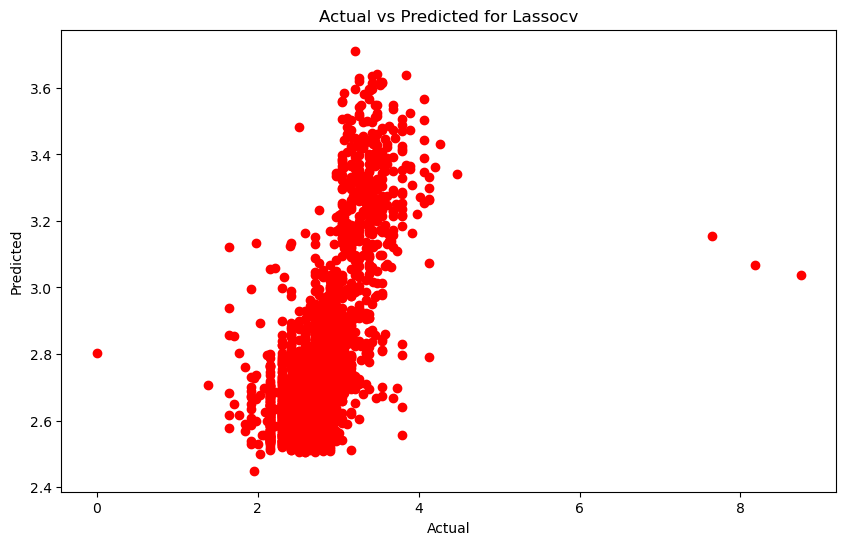

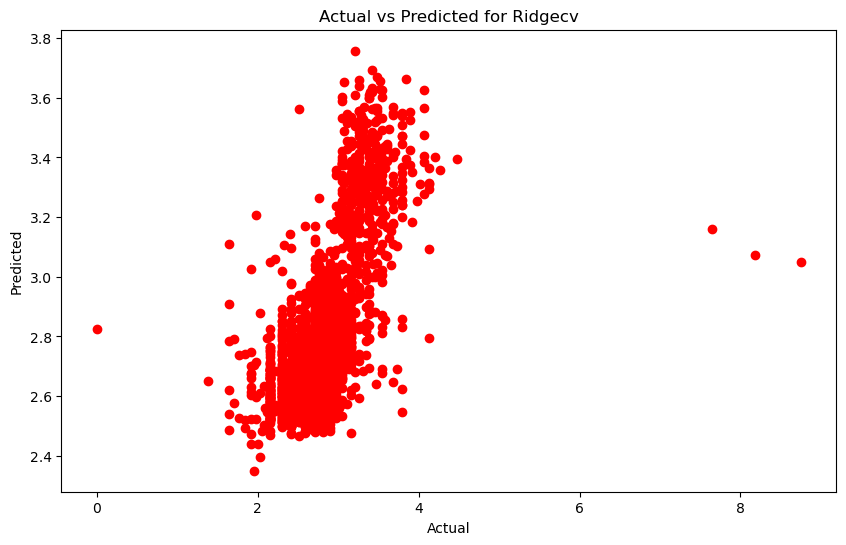

In [59]:
for model_name, model in models.items():
    pred = model.predict(x_test)
    pred1= model.predict(x_train)
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test_ac, pred, color='r')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Actual vs Predicted for {model_name}')
    plt.show()

In [60]:
for model_name, model in models.items():
    cv_scores = cross_val_score(model, x, y_ac, cv=5)
    print(f"{model_name} CV mean accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

Linear Regression CV mean accuracy: -1.52 ± 3.68
KNN CV mean accuracy: -0.34 ± 1.38
Ada Boost Regressor CV mean accuracy: -0.18 ± 0.96
SV CV mean accuracy: 0.28 ± 0.25
Random Forest Regressor CV mean accuracy: 0.22 ± 0.55
Extra Trees Regressor CV mean accuracy: 0.16 ± 0.61
DecisionTreeRegressor CV mean accuracy: -0.80 ± 1.96
Lasso CV mean accuracy: -0.02 ± 0.03
Ridge CV mean accuracy: -1.51 ± 3.67
Lassocv CV mean accuracy: -1.09 ± 2.90
Ridgecv CV mean accuracy: -1.51 ± 3.67


In [61]:
Sv=SVR()

In [62]:
Sv.fit(x_train,y_train_ac)

SVR()

In [63]:
parameter = {
    'C': [0.1, 1, 10],
   'kernel': ['linear', 'rbf']
}

In [64]:
grid_GBC = GridSearchCV(Sv, parameter,cv=2)
grid_GBC.fit(x_train, y_train_ac)

GridSearchCV(cv=2, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']})

In [65]:
import pickle as pkl

In [66]:
filename="zomato_Model.pkl"
with open(filename, 'wb') as file:
    pkl.dump(Sv, file)
with open(filename, 'rb') as file:
    Final_Model = pkl.load(file)
result = Final_Model.score(x_test, y_test_ac)
print(result)

0.6454044554847765


In [67]:
x_train, x_test, y_train_pr, y_test_pr = train_test_split(x, y_pr,test_size=.30,random_state=65)
print('Training size:',x_train.shape)
print('Training target size:',y_train_pr.shape)
print('Test size:',x_test.shape)
print('Test target size:',y_test_pr.shape)

Training size: (6038, 12)
Training target size: (6038,)
Test size: (2588, 12)
Test target size: (2588,)


In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [69]:
models = {
    "LogisticRegression": LogisticRegression(),
    "RandomForestClassifier": RandomForestClassifier(),
    "ExtraTreesClassifier": ExtraTreesClassifier(),
    "SVC": SVC(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "BaggingClassifier": BaggingClassifier(),
    "DecisionTreeClassifier":DecisionTreeClassifier()
}

In [70]:
for model_name, model in models.items():
    model.fit(x_train, y_train_pr)
    y_pred_pr = model.predict(x_test)
    print(f"{model_name} accuracy: {accuracy_score(y_test_pr, y_pred_pr)}")
    print(confusion_matrix(y_test_pr, y_pred_pr))
    print(classification_report(y_test_pr, y_pred_pr))

LogisticRegression accuracy: 0.660741885625966
[[1111  170   12    0]
 [ 391  375   57    7]
 [  33   73  183   26]
 [  16   25   68   41]]
              precision    recall  f1-score   support

           1       0.72      0.86      0.78      1293
           2       0.58      0.45      0.51       830
           3       0.57      0.58      0.58       315
           4       0.55      0.27      0.37       150

    accuracy                           0.66      2588
   macro avg       0.61      0.54      0.56      2588
weighted avg       0.65      0.66      0.65      2588

RandomForestClassifier accuracy: 0.6939721792890263
[[1081  196   16    0]
 [ 299  464   57   10]
 [  17   79  198   21]
 [   8   21   68   53]]
              precision    recall  f1-score   support

           1       0.77      0.84      0.80      1293
           2       0.61      0.56      0.58       830
           3       0.58      0.63      0.61       315
           4       0.63      0.35      0.45       150

    accu

In [71]:
for model_name, model in models.items():
    cv_scores = cross_val_score(model, x, y_pr, cv=5)
    print(f"{model_name} CV mean accuracy: {cv_scores.mean()*100:.2f}% ± {cv_scores.std()*100:.2f}%")

LogisticRegression CV mean accuracy: 63.61% ± 3.20%
RandomForestClassifier CV mean accuracy: 49.64% ± 15.73%
ExtraTreesClassifier CV mean accuracy: 47.95% ± 16.39%
SVC CV mean accuracy: 56.52% ± 12.09%
GradientBoostingClassifier CV mean accuracy: 54.91% ± 14.45%
AdaBoostClassifier CV mean accuracy: 57.42% ± 9.08%
BaggingClassifier CV mean accuracy: 53.92% ± 15.06%
DecisionTreeClassifier CV mean accuracy: 46.52% ± 14.81%


In [72]:
LR=LogisticRegression()

In [73]:
LR.fit(x_train,y_train_pr)

LogisticRegression()

In [74]:
parameter = {
        'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}




In [75]:
grid_GBC = GridSearchCV(LR, parameter,cv=2)
grid_GBC.fit(x_train, y_train_pr)

GridSearchCV(cv=2, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'solver': ['liblinear', 'lbfgs']})

In [76]:
filename="zomato_pr_Model.pkl"
with open(filename, 'wb') as file:
    pkl.dump(LR, file)
with open(filename, 'rb') as file:
    Final_Model = pkl.load(file)
result = Final_Model.score(x_test, y_test_pr)
print(result)

0.660741885625966
